# Power Spectra LFP Analysis"

In [ ]:
!pip install pandas==2.1.0

  Using cached pandas-2.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Brief 1-2 sentence description of notebook.

In [ ]:
import os
import glob
from collections import defaultdict
import re

In [ ]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 32})
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import itertools
from scipy.stats import mannwhitneyu

import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
from spectral_connectivity import Multitaper, Connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [ ]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case

In [ ]:
BBOX_TO_ANCHOR=(1.5, 0.9)
LOC='upper right'

In [ ]:
NUM_LINES = 3

In [ ]:
BASELINE_OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [ ]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [ ]:
ALL_TRIALS_DF = pd.read_pickle("/work/rce_velocity_parsed_power_spectra_region_and_baselinetrial_rows.pkl")

OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs


In [ ]:

ALL_TRIALS_DF = ALL_TRIALS_DF[ALL_TRIALS_DF["velocity_bin"] == 0]

In [ ]:
ALL_TRIALS_DF.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,all_theta_power,all_beta_power,all_gamma_power,mean_theta_power,mean_beta_power,mean_gamma_power
1390,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.01112484550257713, 0.015120199991768696, 0....",mPFC,trial,"[0.02571086160661289, 0.02386118948470161, 0.0...","[0.005872041354160665, 0.00437709912183208, 0....","[0.0013481235550758732, 0.0014766143115329026,...",0.020392,0.002903,0.001121
1391,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.005072513655663902, 0.0071730776351884, 0.0...",mPFC,trial,"[0.07023065342000827, 0.0789233820595888, 0.07...","[0.005556360325548505, 0.0058427471738237554, ...","[0.002455339794817522, 0.0024535349341928427, ...",0.033933,0.002955,0.001144
1392,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.01043389231412404, 0.011229291113011746, 0....",mPFC,trial,"[0.08989826398781812, 0.08913266863907171, 0.0...","[0.005153260616564676, 0.004949280640402602, 0...","[0.0015002537791951546, 0.001641381109648414, ...",0.035508,0.003171,0.001002
1393,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.006360855718027482, 0.007822405773560855, 0...",mPFC,trial,"[0.07011676496657, 0.07614306899028705, 0.0731...","[0.006070116029748905, 0.00520520257898769, 0....","[0.0024729583247388703, 0.001954108878441023, ...",0.034845,0.003142,0.000992
1394,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.00866204042766737, 0.008177641470017987, 0....",mPFC,trial,"[0.06129217695950152, 0.07304316960108179, 0.0...","[0.004078426402114574, 0.00410739670291288, 0....","[0.0015396471734987701, 0.0016383142091968602,...",0.031796,0.002804,0.001040


## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions

- Ideally functions are defined here first and then data is processed using the functions
    - function names are short and in snake case all lowercase
    - a function name should be unique but does not have to describe the function
    - doc strings describe functions not function names

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [ ]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

## Plotting all the lower velocities together

- binned_current_thorax_velocity:
    - 0: 0 to 5cm/s
    - 1: 5 to 10cm/s
    - 2: 10cm/s+

In [ ]:
# ALL_TRIALS_DF["binned_current_thorax_velocity"].unique()

- Filtering for velocity

In [ ]:
# speed_filtered_all_trials_df = ALL_TRIALS_DF[ALL_TRIALS_DF["binned_current_thorax_velocity"] == 0]
speed_filtered_all_trials_df = ALL_TRIALS_DF.copy()

In [ ]:
speed_filtered_all_trials_df.shape

(1385, 33)

In [ ]:
speed_filtered_all_trials_df.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,all_theta_power,all_beta_power,all_gamma_power,mean_theta_power,mean_beta_power,mean_gamma_power
1390,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.01112484550257713, 0.015120199991768696, 0....",mPFC,trial,"[0.02571086160661289, 0.02386118948470161, 0.0...","[0.005872041354160665, 0.00437709912183208, 0....","[0.0013481235550758732, 0.0014766143115329026,...",0.020392,0.002903,0.001121
1391,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.005072513655663902, 0.0071730776351884, 0.0...",mPFC,trial,"[0.07023065342000827, 0.0789233820595888, 0.07...","[0.005556360325548505, 0.0058427471738237554, ...","[0.002455339794817522, 0.0024535349341928427, ...",0.033933,0.002955,0.001144
1392,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.01043389231412404, 0.011229291113011746, 0....",mPFC,trial,"[0.08989826398781812, 0.08913266863907171, 0.0...","[0.005153260616564676, 0.004949280640402602, 0...","[0.0015002537791951546, 0.001641381109648414, ...",0.035508,0.003171,0.001002
1393,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.006360855718027482, 0.007822405773560855, 0...",mPFC,trial,"[0.07011676496657, 0.07614306899028705, 0.0731...","[0.006070116029748905, 0.00520520257898769, 0....","[0.0024729583247388703, 0.001954108878441023, ...",0.034845,0.003142,0.000992
1394,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.00866204042766737, 0.008177641470017987, 0....",mPFC,trial,"[0.06129217695950152, 0.07304316960108179, 0.0...","[0.004078426402114574, 0.00410739670291288, 0....","[0.0015396471734987701, 0.0016383142091968602,...",0.031796,0.002804,0.001040


In [ ]:
all_frequencies = speed_filtered_all_trials_df["frequencies"].iloc[0]

In [ ]:
all_frequencies

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [ ]:
speed_filtered_all_trials_df["power"].iloc[0].shape

(500,)

- Filter by frequnecy band

In [ ]:
# speed_filtered_all_trials_df["theta_power_for_all_segments"] = speed_filtered_all_trials_df["power"].apply(lambda x: x[4:13])

In [ ]:
# speed_filtered_all_trials_df["theta_power_for_all_segments"].iloc[0]

- Getting the mean power for all frequency bands for one time segment

In [ ]:
# speed_filtered_all_trials_df["mean_theta_power"] = speed_filtered_all_trials_df["theta_power_for_all_segments"].apply(lambda x: np.mean(x))

In [ ]:
# speed_filtered_all_trials_df["mean_theta_power"].iloc[0]


- Getting the average of all the mean powers for each group

In [ ]:
speed_filtered_all_trials_df.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,all_theta_power,all_beta_power,all_gamma_power,mean_theta_power,mean_beta_power,mean_gamma_power
1390,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.01112484550257713, 0.015120199991768696, 0....",mPFC,trial,"[0.02571086160661289, 0.02386118948470161, 0.0...","[0.005872041354160665, 0.00437709912183208, 0....","[0.0013481235550758732, 0.0014766143115329026,...",0.020392,0.002903,0.001121
1391,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.005072513655663902, 0.0071730776351884, 0.0...",mPFC,trial,"[0.07023065342000827, 0.0789233820595888, 0.07...","[0.005556360325548505, 0.0058427471738237554, ...","[0.002455339794817522, 0.0024535349341928427, ...",0.033933,0.002955,0.001144
1392,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.01043389231412404, 0.011229291113011746, 0....",mPFC,trial,"[0.08989826398781812, 0.08913266863907171, 0.0...","[0.005153260616564676, 0.004949280640402602, 0...","[0.0015002537791951546, 0.001641381109648414, ...",0.035508,0.003171,0.001002
1393,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.006360855718027482, 0.007822405773560855, 0...",mPFC,trial,"[0.07011676496657, 0.07614306899028705, 0.0731...","[0.006070116029748905, 0.00520520257898769, 0....","[0.0024729583247388703, 0.001954108878441023, ...",0.034845,0.003142,0.000992
1394,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_trial_velocity_parsed_window_averaged_power,"[0.00866204042766737, 0.008177641470017987, 0....",mPFC,trial,"[0.06129217695950152, 0.07304316960108179, 0.0...","[0.004078426402114574, 0.00410739670291288, 0....","[0.0015396471734987701, 0.0016383142091968602,...",0.031796,0.002804,0.001040


In [ ]:
speed_filtered_all_trials_df = speed_filtered_all_trials_df[speed_filtered_all_trials_df["trial_or_baseline"] == "trial"].copy()

In [ ]:
mean_power_df = pd.DataFrame(speed_filtered_all_trials_df.groupby(['brain_region', 'trial_outcome', 'trial_or_baseline'])["mean_theta_power"].mean()).reset_index()

In [ ]:
sem_power_df = pd.DataFrame(speed_filtered_all_trials_df.groupby(['brain_region', 'trial_outcome', 'trial_or_baseline'])["mean_theta_power"].sem()).reset_index()

In [ ]:
mean_power_df.head(n=20)

,brain_region,trial_outcome,trial_or_baseline,mean_theta_power
0,BLA,lose,trial,0.026867
1,BLA,omission,trial,0.018122
2,BLA,rewarded,trial,0.019247
3,BLA,win,trial,0.022049
4,LH,lose,trial,0.033213
5,LH,omission,trial,0.026354
6,LH,rewarded,trial,0.023947
7,LH,win,trial,0.027331
8,MD,lose,trial,0.033464
9,MD,omission,trial,0.026509


In [ ]:
sem_power_df.head(n=20)

,brain_region,trial_outcome,trial_or_baseline,mean_theta_power
0,BLA,lose,trial,0.001513
1,BLA,omission,trial,0.001600
2,BLA,rewarded,trial,0.000759
3,BLA,win,trial,0.000637
4,LH,lose,trial,0.002447
5,LH,omission,trial,0.002835
6,LH,rewarded,trial,0.000793
7,LH,win,trial,0.000756
8,MD,lose,trial,0.001784
9,MD,omission,trial,0.002945


- Plot the mean power

In [ ]:
outcome_colors = {
    "lose": "red",
    "omission": "orange",
    "rewarded": "green",
    "win": "blue"
}

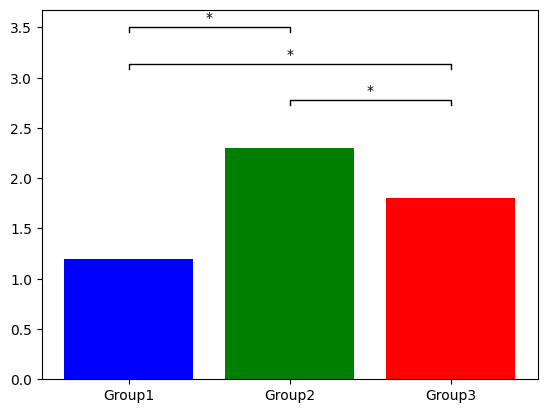

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Sample data
groups = ['Group1', 'Group2', 'Group3']
values = [1.2, 2.3, 1.8]

# Dictionary holding the results of your statistical comparisons
# Keys are tuples indicating the groups being compared; values are the corresponding p-values
stats_dict = {('Group1', 'Group2'): 0.04, ('Group1', 'Group3'): 0.01, ('Group2', 'Group3'): 0.01}

# Thresholds for significance levels
alpha = 0.05  # usually 0.05
alpha_strong = 0.01  # example value

# Create bar plot
fig, ax = plt.subplots()
bars = plt.bar(groups, values, color=['blue', 'green', 'red'])

# Get the y-axis limits
bottom, top = ax.get_ylim()
y_range = top - bottom

# Retrieve x-coordinates of the bars
x_coords = [bar.get_x() + bar.get_width() / 2.0 for bar in bars]  # get_x() retrieves the left coordinate, we adjust by half the width to get the center
group_to_x_coord = {group: x_coord for group, x_coord in zip(groups, x_coords)}


# Significance bars
for i, (key, value) in enumerate(stats_dict.items()):
    # Significance level
    p = value
    if p < 0.001:
        sig_symbol = '***'
    elif p < 0.01:
        sig_symbol = '**'
    elif p < 0.05:
        sig_symbol = '*'
    else:
        continue
    
    # Columns corresponding to the datasets of interest
    x1 = key[0]
    x2 = key[1]
    # What level is this bar among the bars above the plot?
    level = len(stats_dict) - i
    # Plot the bar
    bar_height = (y_range * 0.15 * level) + top
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )
    
    text_height = bar_height + (y_range * 0.01)
    plt.text((group_to_x_coord[x1] + group_to_x_coord[x2]) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')

In [ ]:
from scipy.stats import mannwhitneyu
unique_regions = speed_filtered_all_trials_df['brain_region'].unique()
theta_region_to_outcome_to_rank_sum = defaultdict(dict)


for region in unique_regions:
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['brain_region'] == region]
    
    win_data = region_data[region_data['trial_outcome'] == 'win']['mean_theta_power']
    lose_data = region_data[region_data['trial_outcome'] == 'lose']['mean_theta_power']
    omiss_data = region_data[region_data['trial_outcome'] == 'omission']['mean_theta_power']
    reward_data = region_data[region_data['trial_outcome'] == 'rewarded']['mean_theta_power']
    
    winlose_statistic, winlose_p_value = mannwhitneyu(win_data, lose_data, alternative='two-sided')
    loseomiss_statistic, loseomiss_p_value = mannwhitneyu(lose_data, omiss_data, alternative='two-sided')
    rewardwin_statistic, rewardwin_p_value = mannwhitneyu(reward_data, win_data, alternative='two-sided')
    
    theta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_lose"] = winlose_statistic, winlose_p_value
    theta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["lose_omission"] = loseomiss_statistic, loseomiss_p_value
    theta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_rewarded"] = rewardwin_statistic, rewardwin_p_value

    print('Win-Lose Rank Sum Wilcoxon statistic:', winlose_statistic)
    print('Win-Lose P-value:', winlose_p_value)
    print('Lose-Omission Rank Sum Wilcoxon statistic:', loseomiss_statistic)
    print('Lose-Omission P-value:', loseomiss_p_value)
    print('Rewarded-Win Rank Sum Wilcoxon statistic:', rewardwin_statistic)
    print('Rewarded-Win P-value:', rewardwin_p_value)
    print('\n')



Brain Region: mPFC
Win-Lose Rank Sum Wilcoxon statistic: 4598.0
Win-Lose P-value: 0.008019984197434823
Lose-Omission Rank Sum Wilcoxon statistic: 817.0
Lose-Omission P-value: 0.4273024866066387
Rewarded-Win Rank Sum Wilcoxon statistic: 2704.0
Rewarded-Win P-value: 0.0002695413785001925


Brain Region: vHPC
Win-Lose Rank Sum Wilcoxon statistic: 2477.0
Win-Lose P-value: 0.00014580061566641658
Lose-Omission Rank Sum Wilcoxon statistic: 914.0
Lose-Omission P-value: 0.09416637543787974
Rewarded-Win Rank Sum Wilcoxon statistic: 3437.0
Rewarded-Win P-value: 0.13122711666492498


Brain Region: BLA
Win-Lose Rank Sum Wilcoxon statistic: 2421.0
Win-Lose P-value: 7.233401504359848e-05
Lose-Omission Rank Sum Wilcoxon statistic: 1129.0
Lose-Omission P-value: 0.00028970298533897515
Rewarded-Win Rank Sum Wilcoxon statistic: 3420.0
Rewarded-Win P-value: 0.1190519865553626


Brain Region: LH
Win-Lose Rank Sum Wilcoxon statistic: 2545.0
Win-Lose P-value: 0.00032909651455132773
Lose-Omission Rank Sum Wilc

Processing for region: BLA, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 7.233401504359848e-05
Processing for region: BLA, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.00028970298533897515
Processing for region: BLA, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.1190519865553626
Skipping Mann-Whitney U test as one or both datasets are empty.


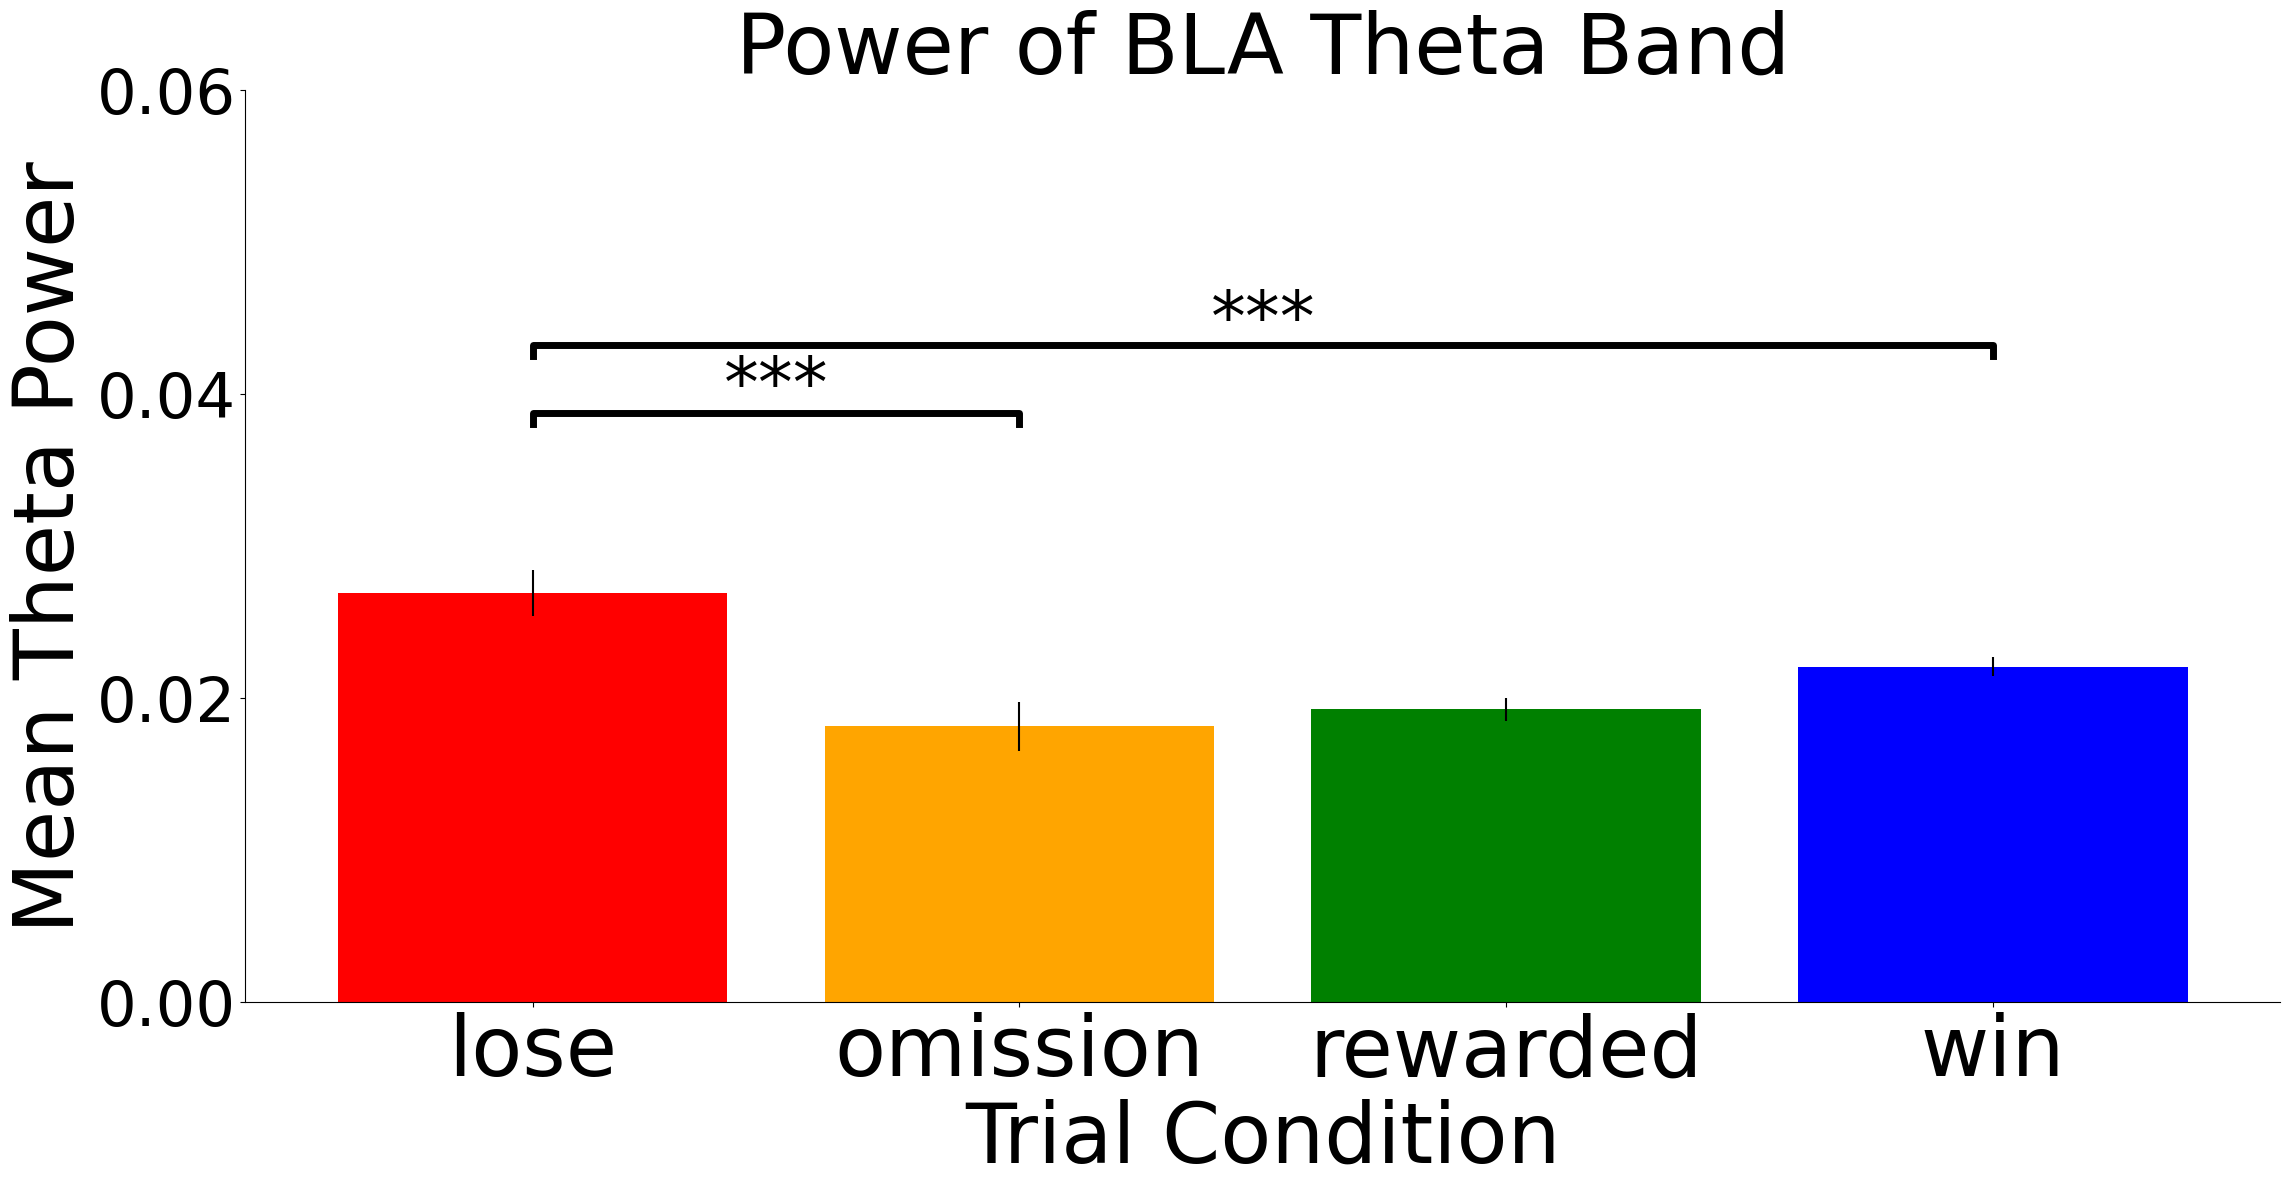

Processing for region: LH, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.00032909651455132773
Processing for region: LH, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.023051372304387443
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: LH, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.0012910814000982457


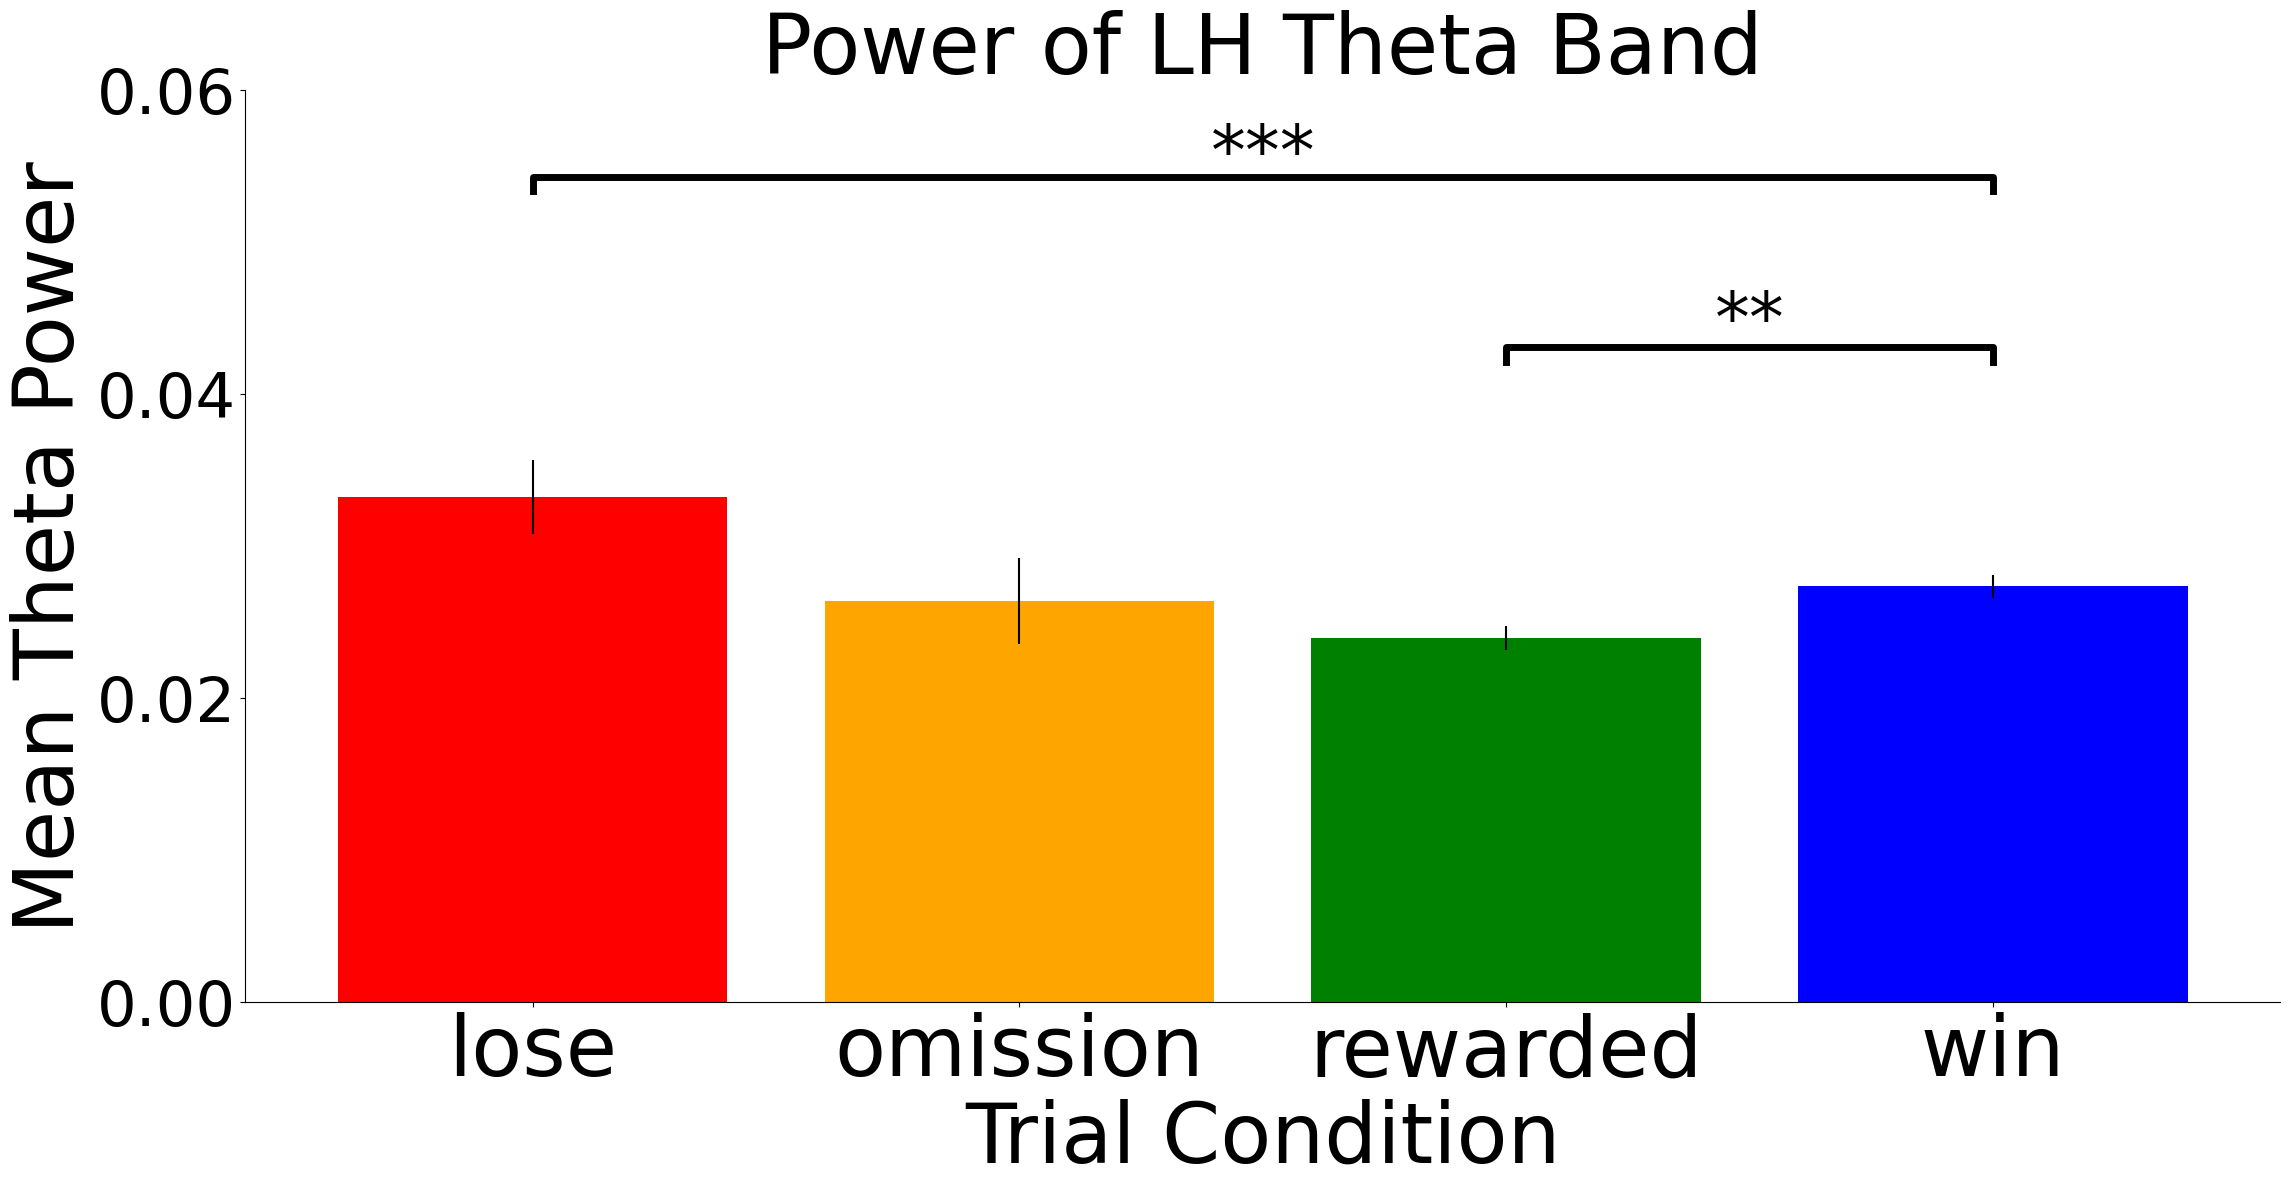

Processing for region: MD, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.03540971816153118
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: MD, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.012125905986872163
Processing for region: MD, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 9.53984922703669e-05


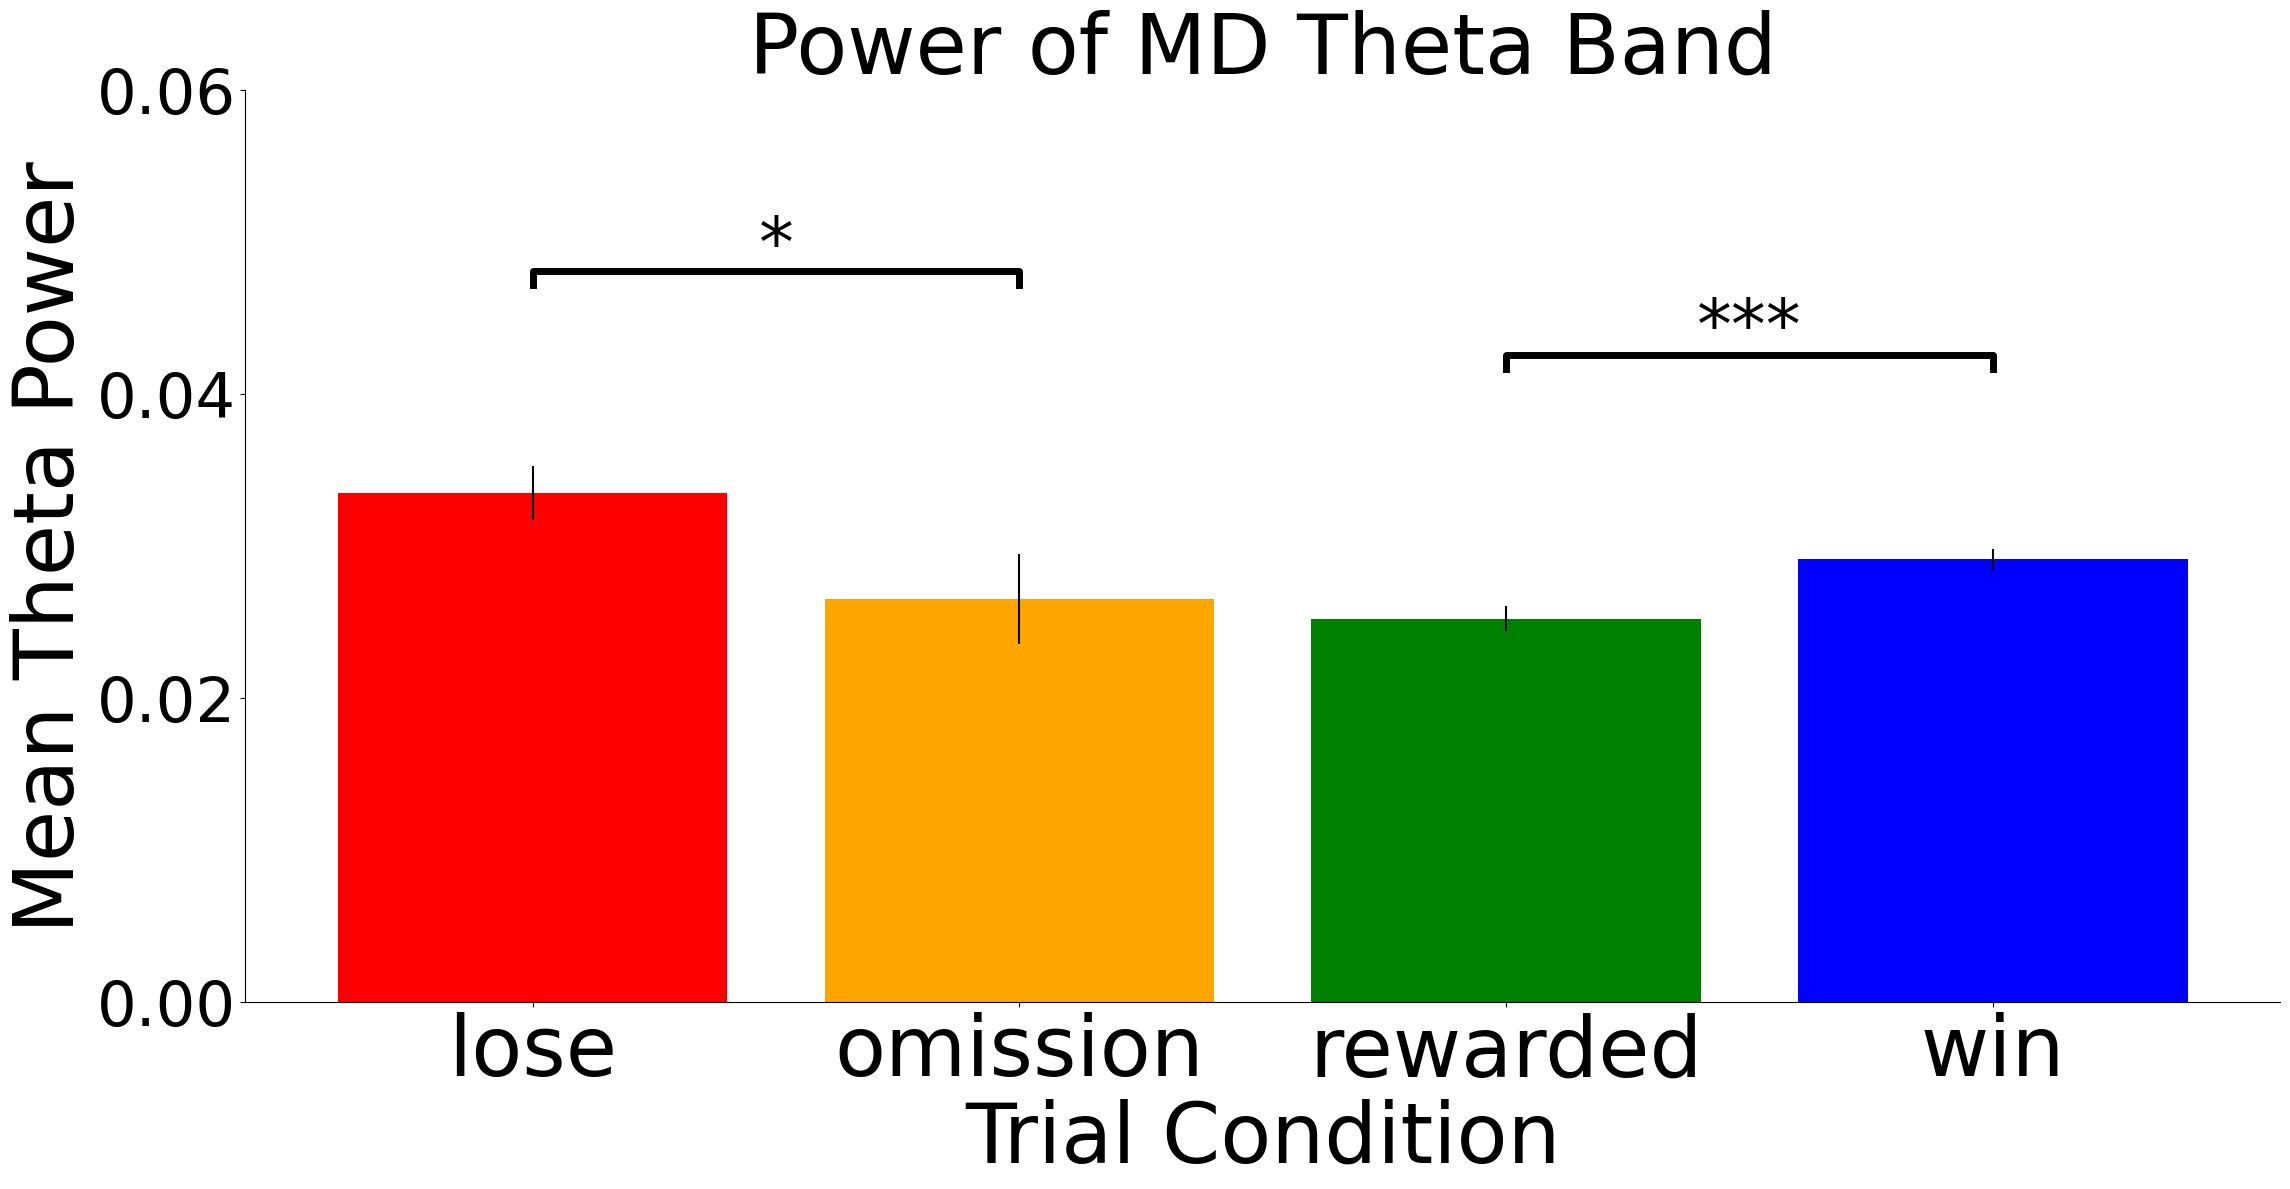

Processing for region: mPFC, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.008019984197434823
Processing for region: mPFC, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.4273024866066387
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: mPFC, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.0002695413785001925


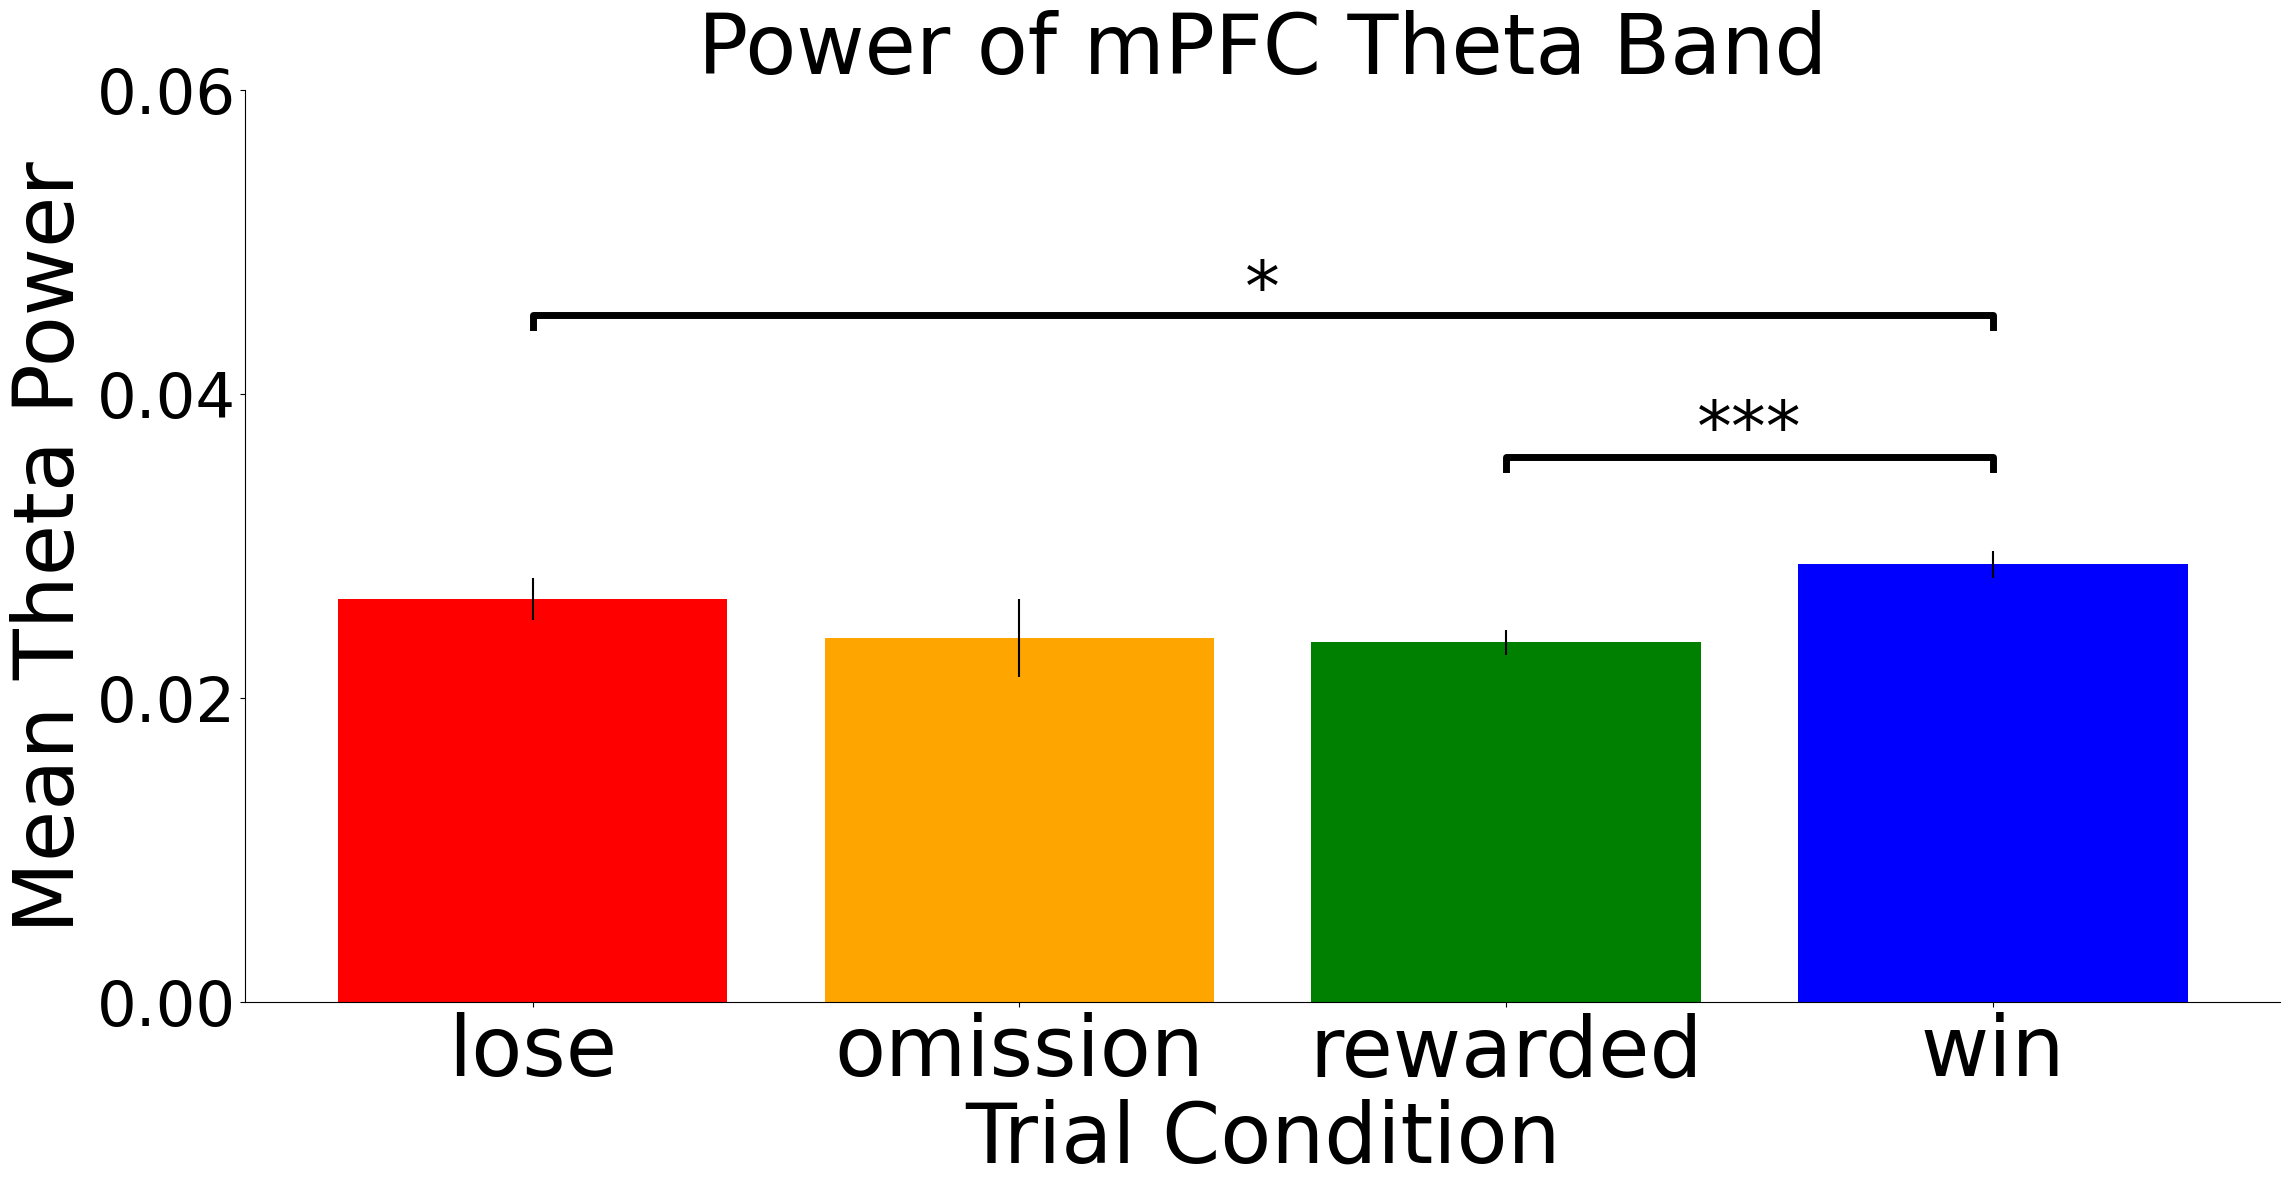

Processing for region: vHPC, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.00014580061566641658
Processing for region: vHPC, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.09416637543787974
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: vHPC, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.13122711666492498
Skipping Mann-Whitney U test as one or both datasets are empty.


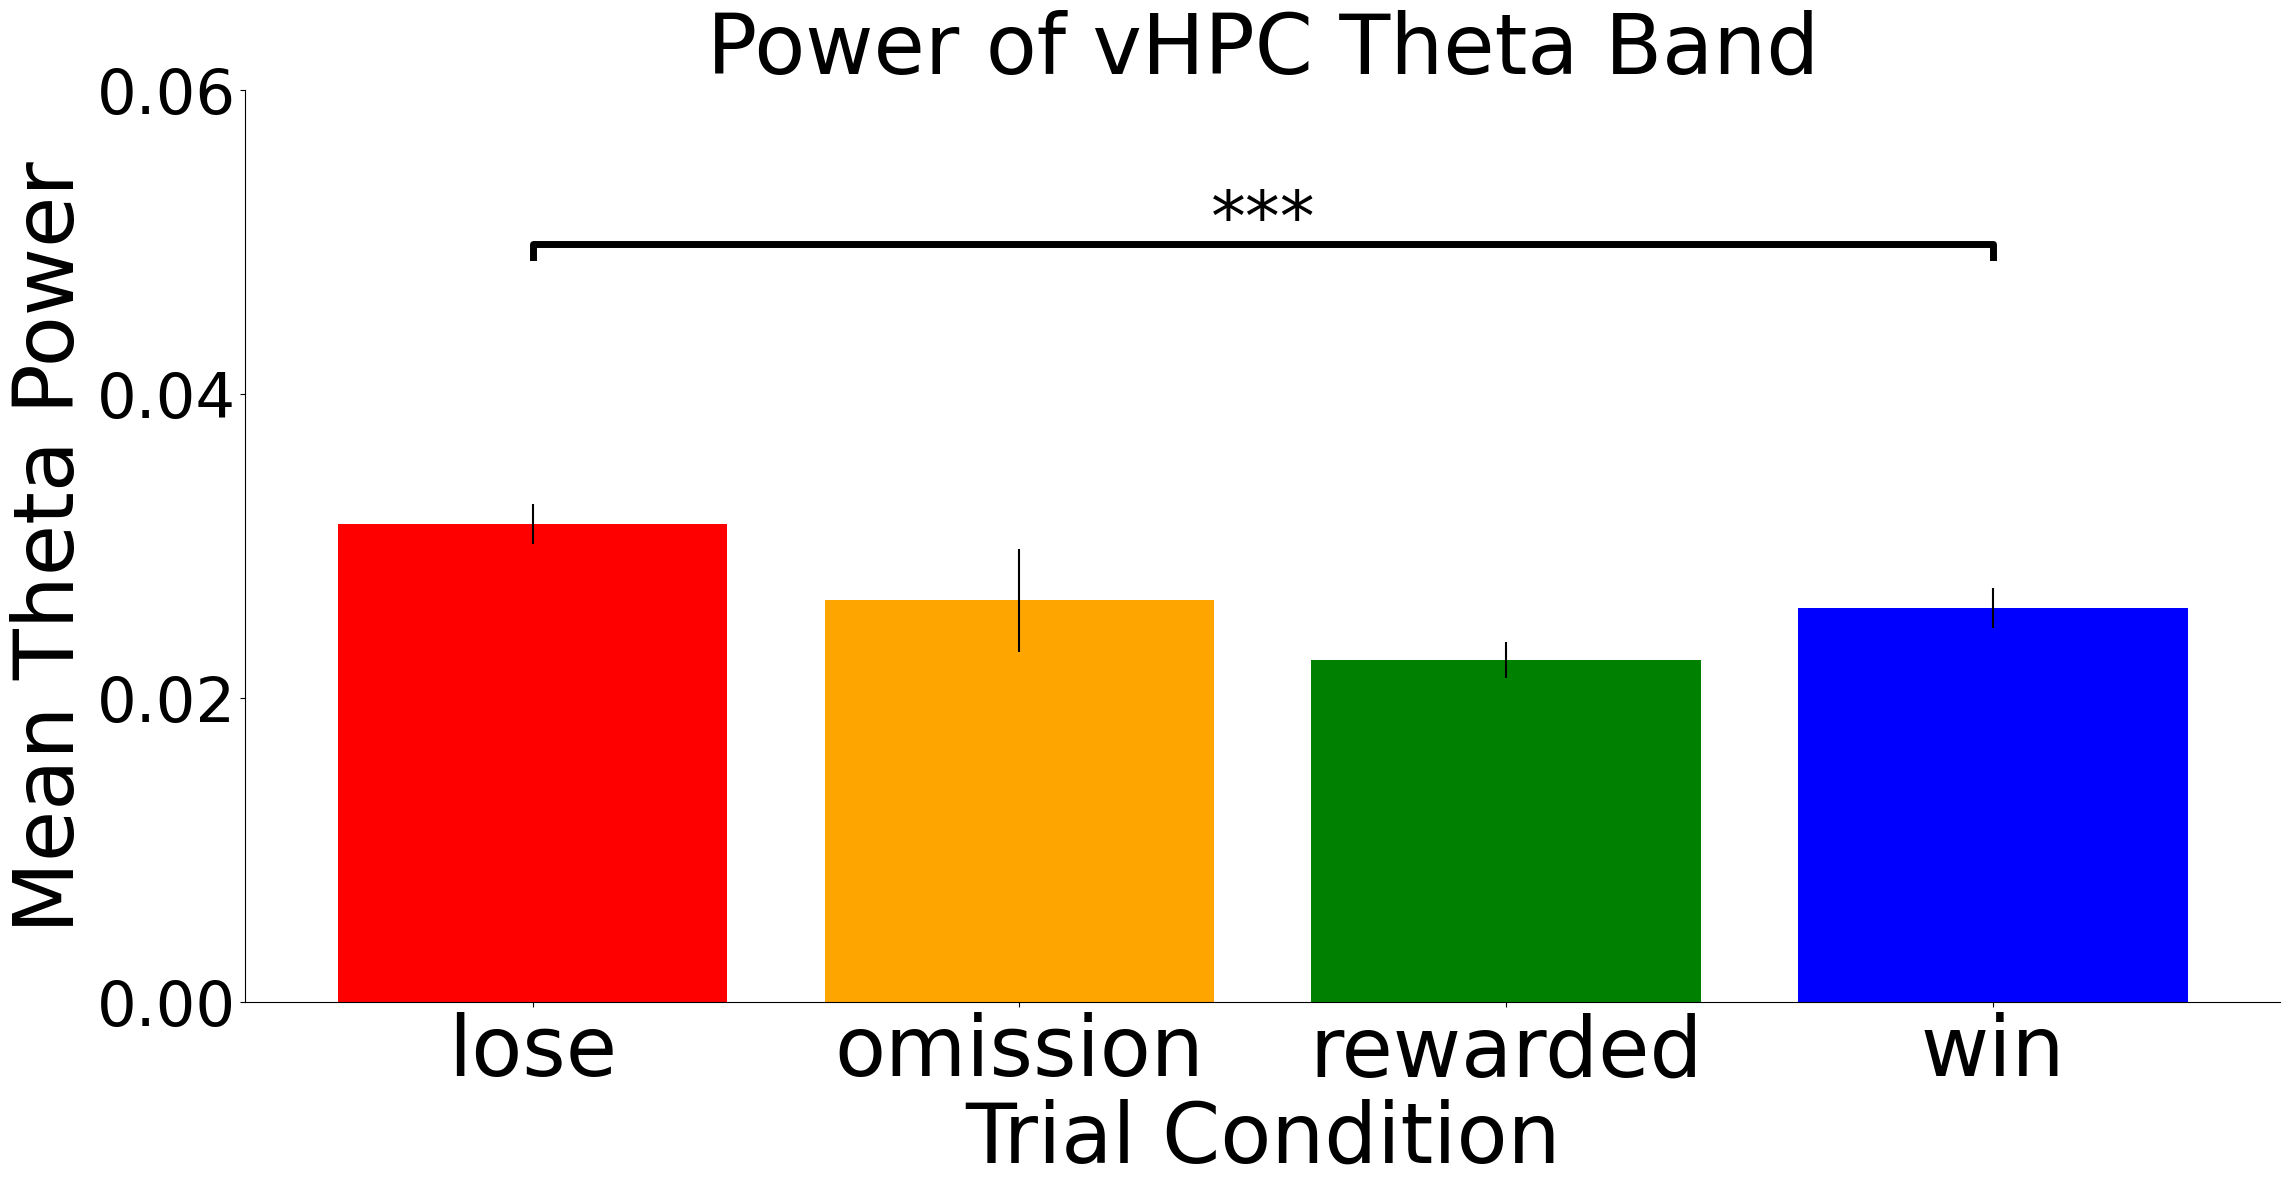

In [ ]:
## TODO: REMOVE THIS COPY FOR TESTING
import numpy as np

for region in mean_power_df["brain_region"].unique():
    fig, ax = plt.subplots(figsize=(23, 12))
    mean_region_df = mean_power_df[(mean_power_df["brain_region"] == region) & (mean_power_df["trial_or_baseline"] == "trial")]
    sem_region_df = sem_power_df[(sem_power_df["brain_region"] == region) & (sem_power_df["trial_or_baseline"] == "trial")]

    colors = [outcome_colors.get(outcome, "gray") for outcome in mean_region_df["trial_outcome"]]
    clean_region_name = region.replace("spike_interface_", "")
    plt.title("Power of {} Theta Band".format(clean_region_name), fontsize=60)
    plt.xlabel("Trial Condition", fontsize=60)
    plt.ylabel("Mean Theta Power", fontsize=60)
    bars = plt.bar(mean_region_df["trial_outcome"], mean_region_df["mean_theta_power"], yerr=sem_region_df["mean_theta_power"], color=colors)
    plt.xticks(fontsize=60)
    plt.yticks(fontsize=45)
    plt.locator_params(axis='y', nbins=4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    comparisons = [("win", "lose"), ("lose", "omission"), ("win", "rewarded")]

    # Get the y-axis limits
    bottom, top = ax.get_ylim()
    y_range = top - bottom

    # Retrieve x-coordinates of the bars
    x_coords = [bar.get_x() + bar.get_width() / 2.0 for bar in bars]  # get_x() retrieves the left coordinate, we adjust by half the width to get the center
    group_to_x_coord = {group: x_coord for group, x_coord in zip(mean_region_df["trial_outcome"].values, x_coords)}


    for i, (outcome1, outcome2) in enumerate(comparisons):
        print(f"Processing for region: {region}, outcome1: {outcome1}, outcome2: {outcome2}")

        data1 = speed_filtered_all_trials_df[(speed_filtered_all_trials_df["brain_region"] == region) & (speed_filtered_all_trials_df["trial_outcome"] == outcome1)]["mean_theta_power"]
        data2 = speed_filtered_all_trials_df[(speed_filtered_all_trials_df["brain_region"] == region) & (speed_filtered_all_trials_df["trial_outcome"] == outcome2)]["mean_theta_power"]


        print(f"Comparison: {outcome1} vs {outcome2}")

        if len(data1) > 0 and len(data2) > 0:
            # Perform Mann-Whitney U test
            _, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
            print("P-value:", p_value)

            bonferroni_threshold = 0.05 / len(comparisons)

            if p_value < bonferroni_threshold:
                

                if p_value < 0.001 / len(comparisons):
                    sig_symbol = '***'
                elif p_value < 0.01 / len(comparisons):
                    sig_symbol = '**'
                elif p_value < 0.05 / len(comparisons):
                    sig_symbol = '*'
                else:
                    continue

                
                x1 = outcome1
                x2 = outcome2
                # What level is this bar among the bars above the plot?
                level = len(comparisons) - i
                # Plot the bar
                bar_height = (y_range * 0.15 * level) + top
                bar_tips = bar_height - (y_range * 0.025)
                plt.plot(
                    [x1, x1, x2, x2],
                    [bar_tips, bar_height, bar_height, bar_tips], lw=5, c='k'
                )
                
                text_height = bar_height * 0.98 + (y_range / 100)
                plt.text((group_to_x_coord[x1] + group_to_x_coord[x2]) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', size=50)



            else:
                print("Skipping Mann-Whitney U test as one or both datasets are empty.")
    plt.ylim(0, 0.06)
    plt.tight_layout()
    plt.savefig("/work/proc/velocity_parsed_power/{}_{}_velocity_parsed_lfp_power.eps".format(region, "theta")) #nancy changed png to eps
    plt.savefig("/work/proc/velocity_parsed_power/{}_{}_velocity_parsed_lfp_power.png".format(region, "theta")) #nancy changed png to eps

    plt.show()


In [ ]:
sem_power_df = pd.DataFrame(speed_filtered_all_trials_df.groupby(['brain_region', 'trial_outcome', 'trial_or_baseline'])["mean_beta_power"].sem()).reset_index()

In [ ]:
mean_power_df = pd.DataFrame(speed_filtered_all_trials_df.groupby(['brain_region', 'trial_outcome', 'trial_or_baseline'])["mean_beta_power"].mean()).reset_index()

In [ ]:
mean_power_df.head(n=20)

,brain_region,trial_outcome,trial_or_baseline,mean_beta_power
0,BLA,lose,trial,0.004627
1,BLA,omission,trial,0.003656
2,BLA,rewarded,trial,0.004052
3,BLA,win,trial,0.004903
4,LH,lose,trial,0.004505
5,LH,omission,trial,0.003639
6,LH,rewarded,trial,0.003595
7,LH,win,trial,0.003633
8,MD,lose,trial,0.004023
9,MD,omission,trial,0.003478


In [ ]:
sem_power_df.head(n=20)

,brain_region,trial_outcome,trial_or_baseline,mean_beta_power
0,BLA,lose,trial,0.000313
1,BLA,omission,trial,0.000248
2,BLA,rewarded,trial,0.000121
3,BLA,win,trial,0.000077
4,LH,lose,trial,0.000521
5,LH,omission,trial,0.000299
6,LH,rewarded,trial,0.000101
7,LH,win,trial,0.000074
8,MD,lose,trial,0.000345
9,MD,omission,trial,0.000341


Processing for region: BLA, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 5.53435480245421e-06
Processing for region: BLA, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.02416864068592193
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: BLA, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 3.010577047020044e-08


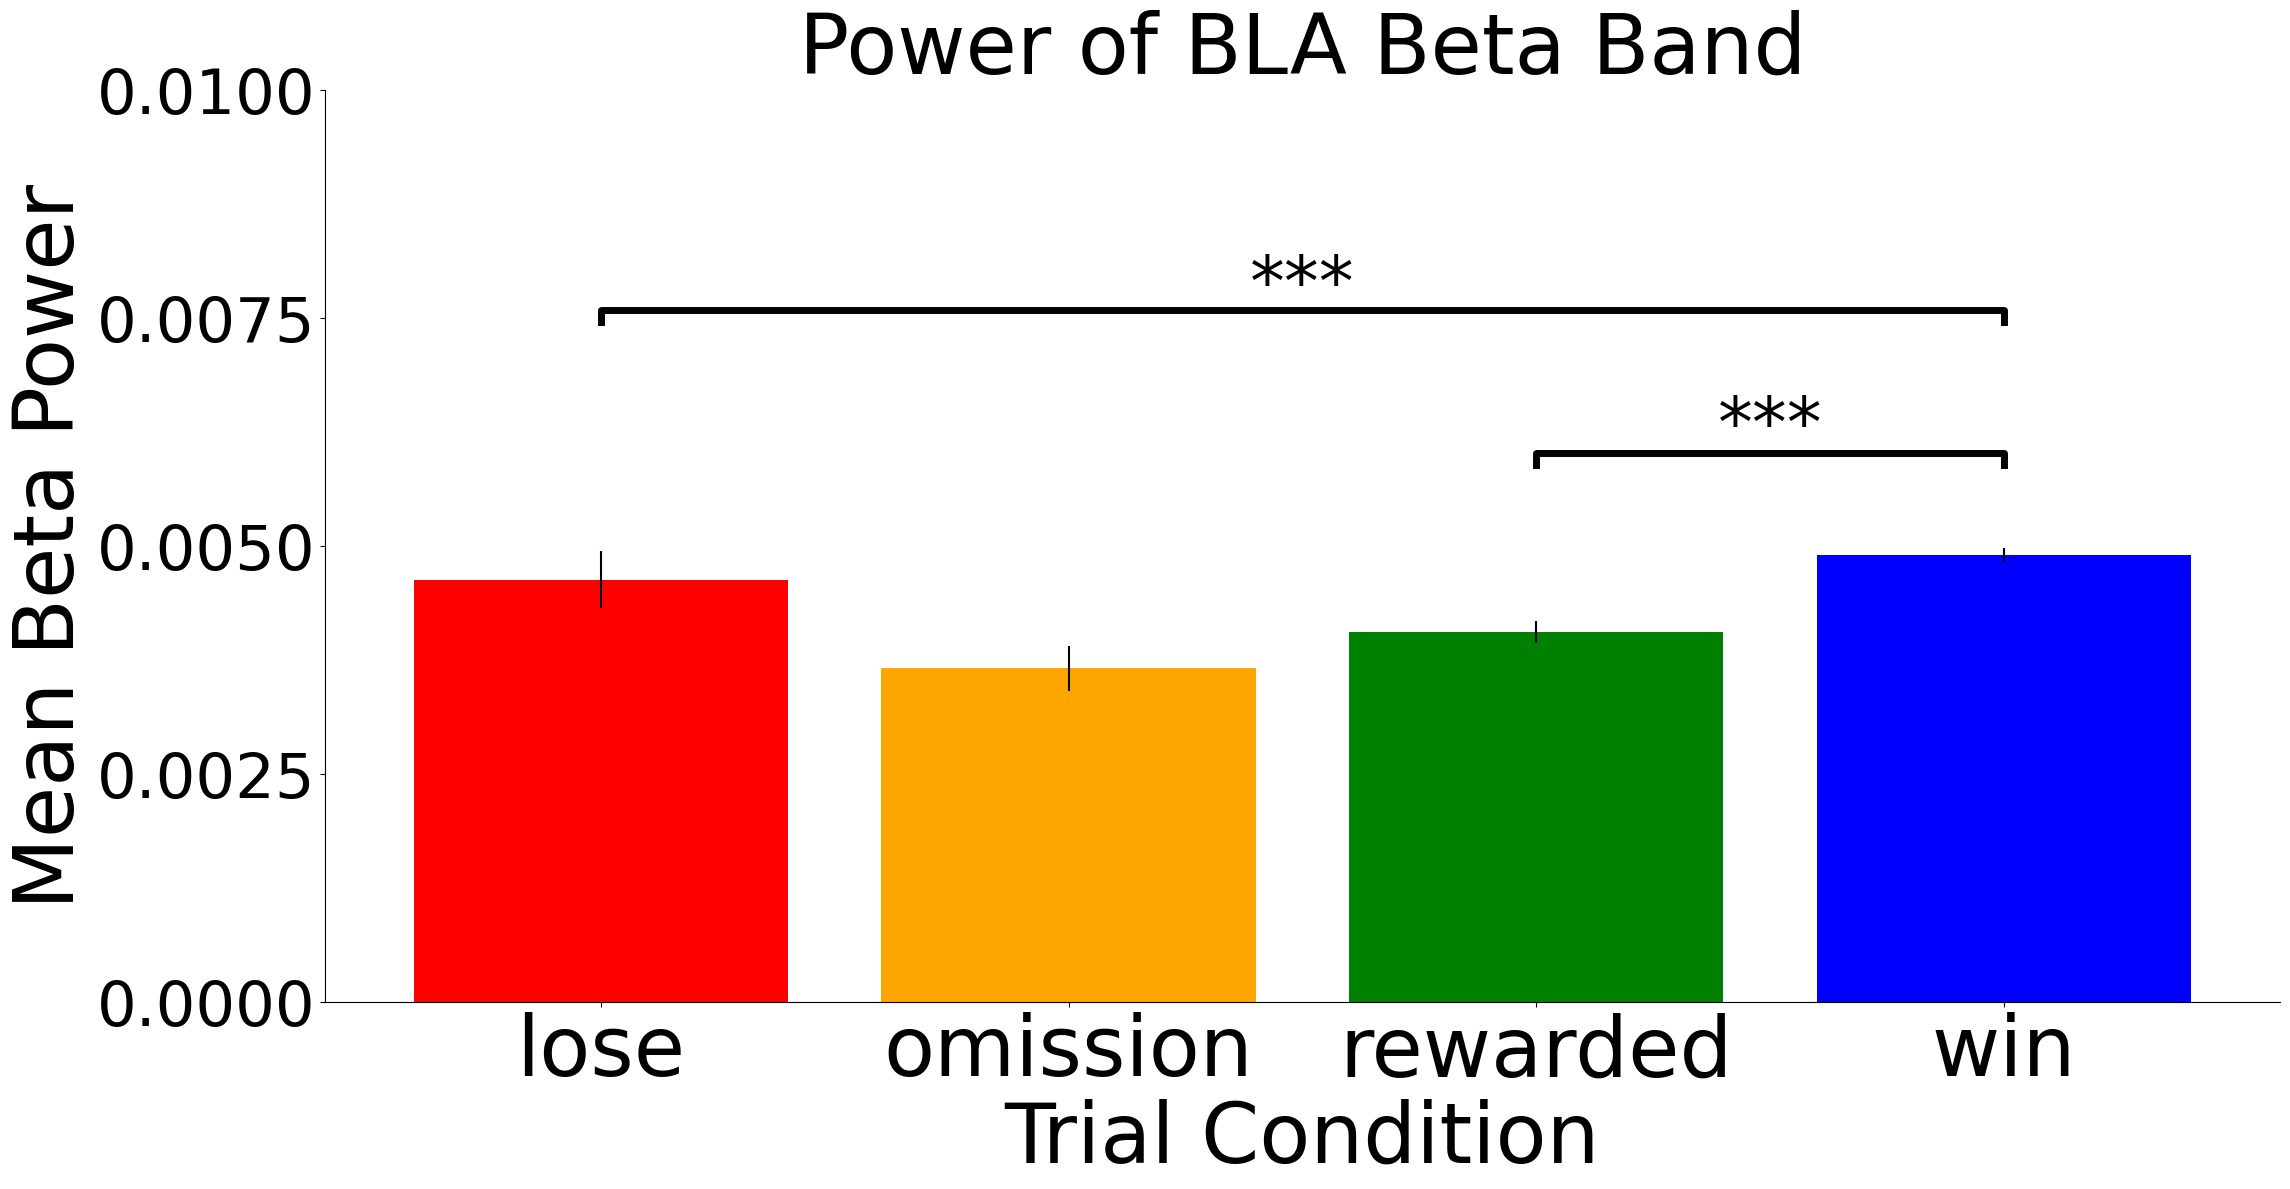

Processing for region: LH, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 6.872891135770044e-05
Processing for region: LH, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.24005558936756932
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: LH, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.28868618401007295
Skipping Mann-Whitney U test as one or both datasets are empty.


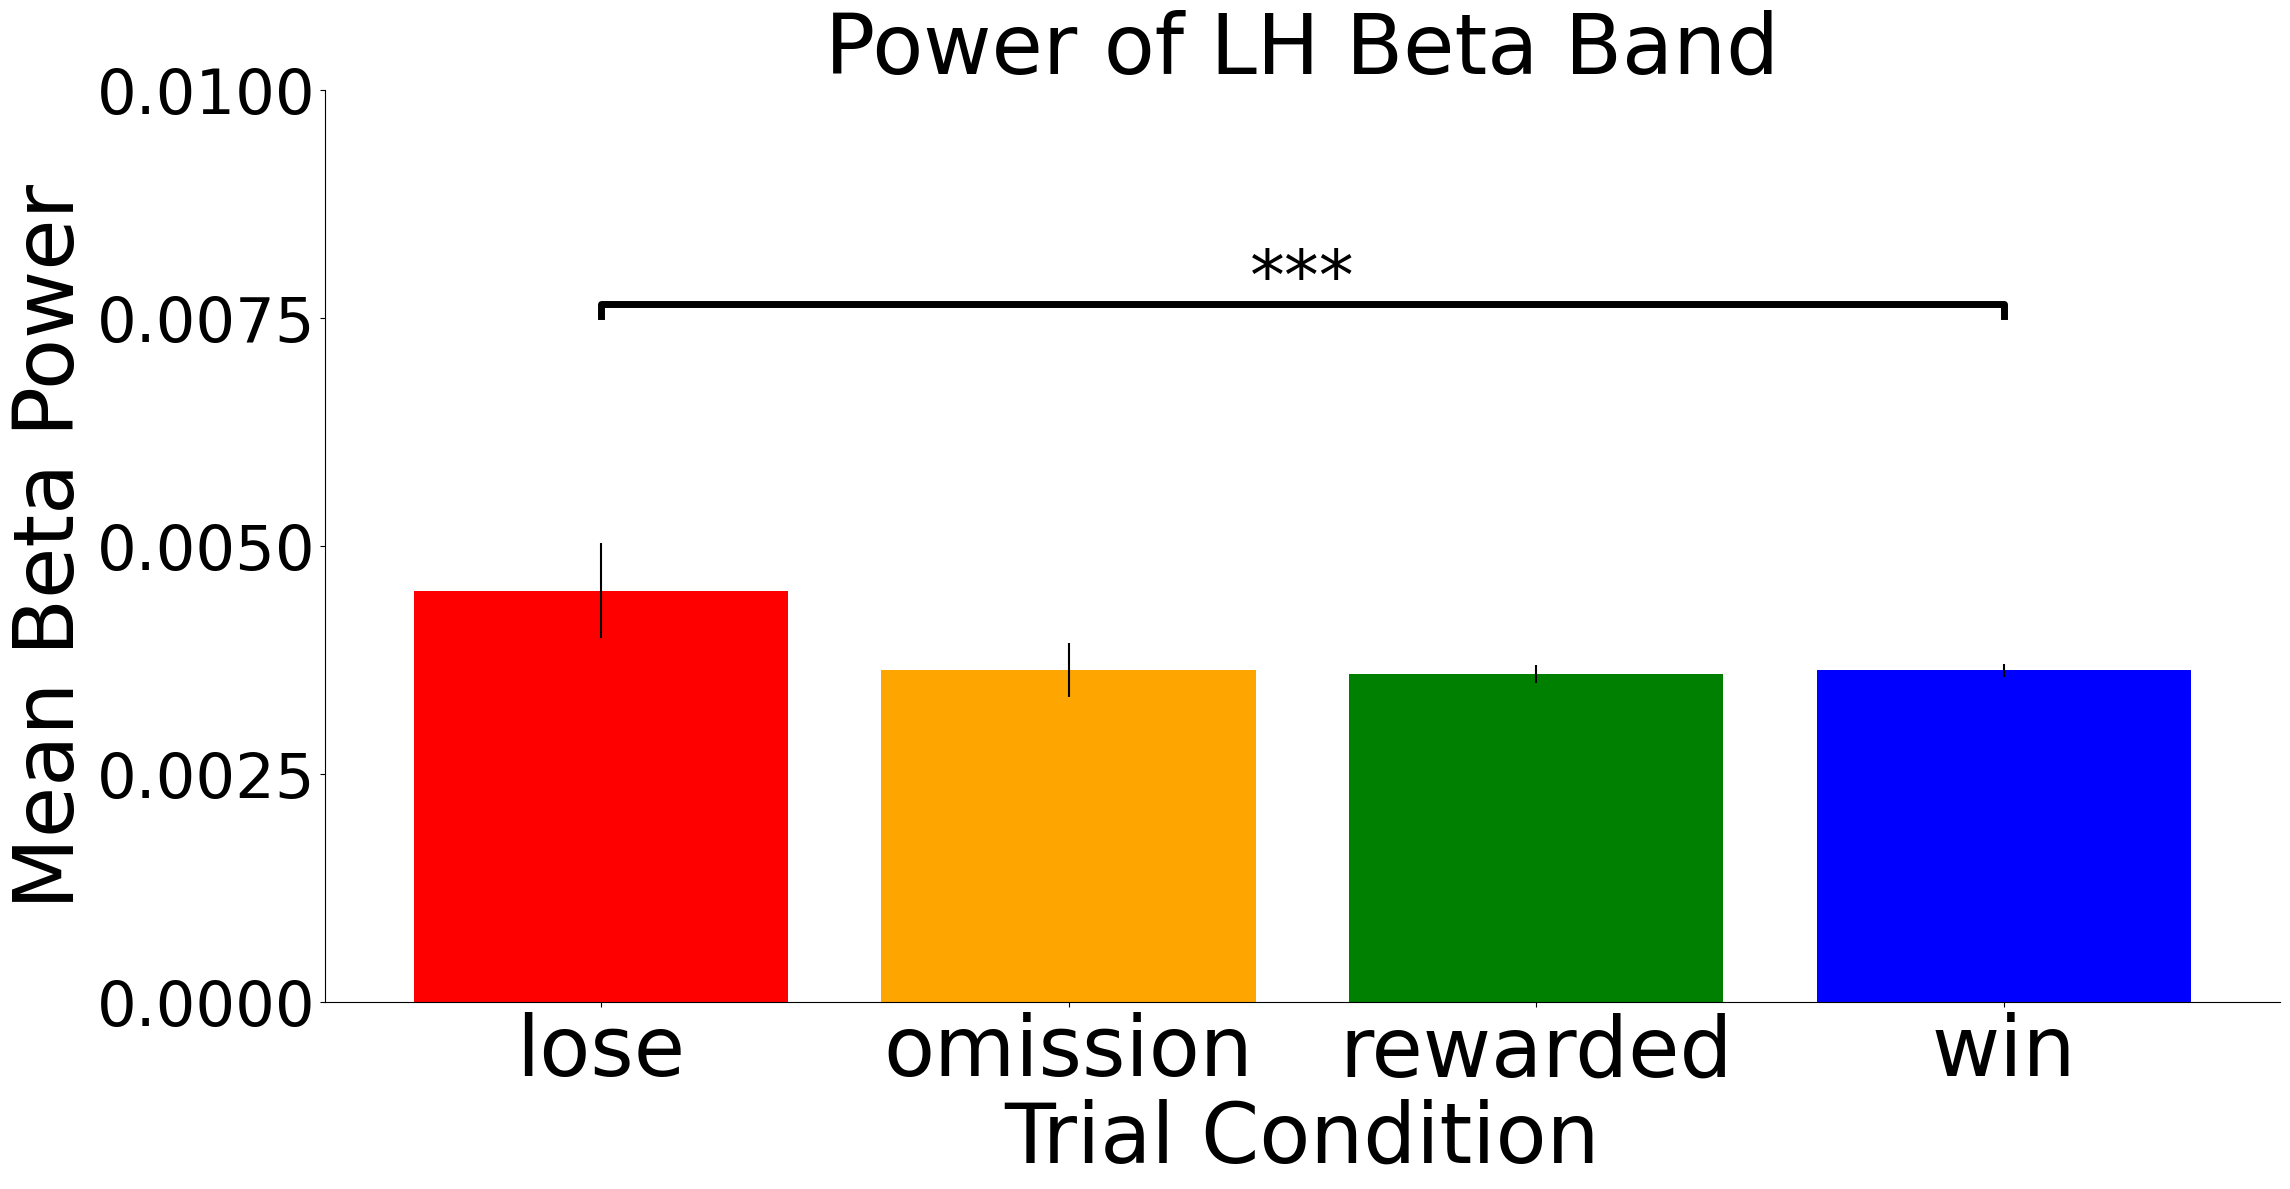

Processing for region: MD, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 1.0958914648656908e-07
Processing for region: MD, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.3912672792826394
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: MD, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.006242724833860404


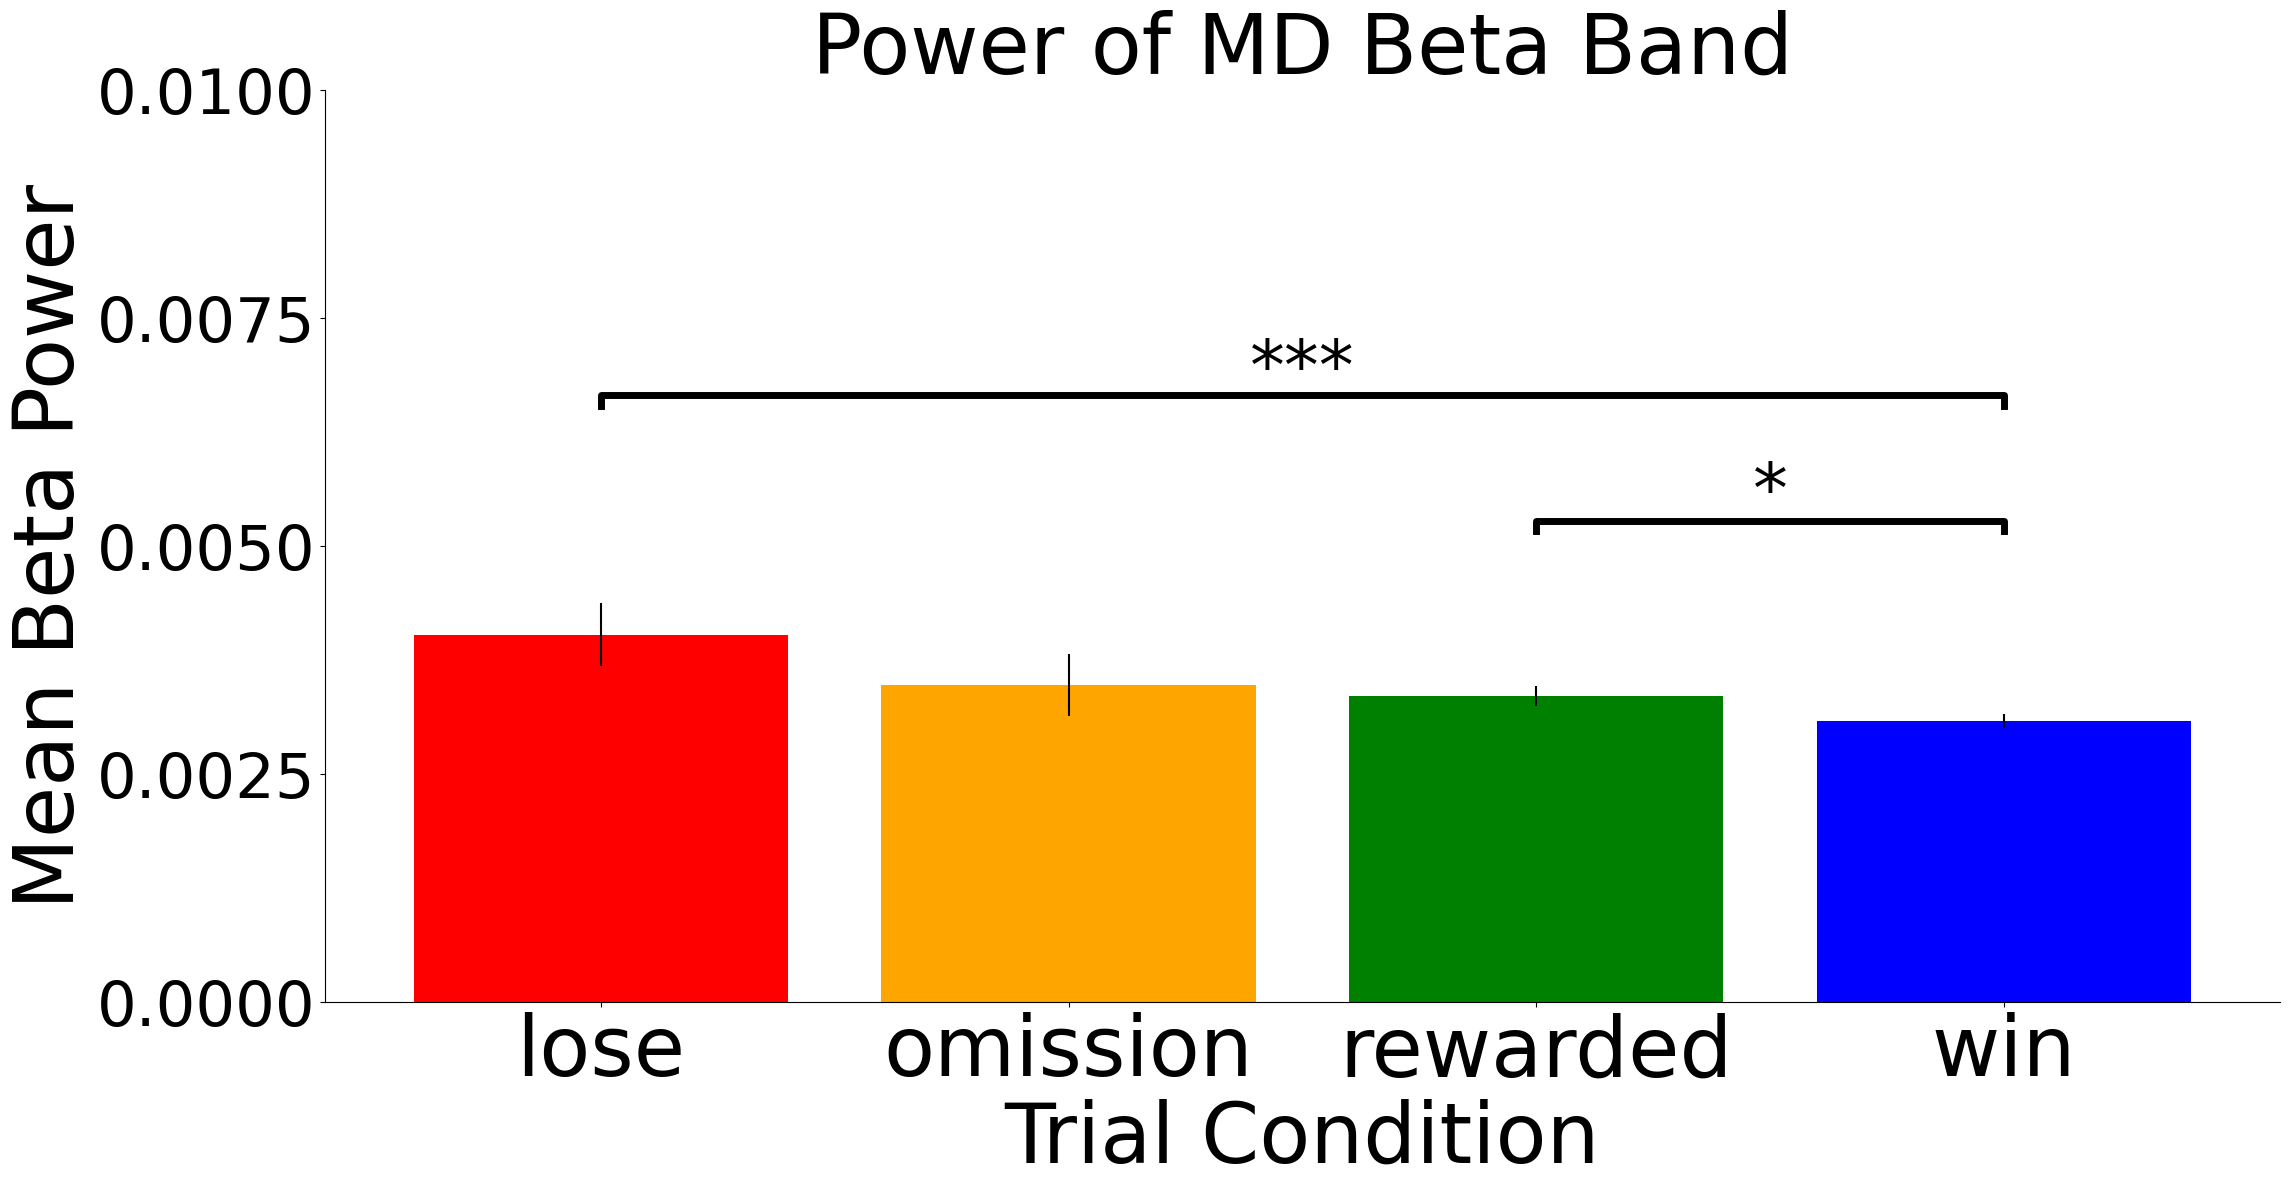

Processing for region: mPFC, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.175330099230253
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: mPFC, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.5048963528855486
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: mPFC, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.09914727858658996
Skipping Mann-Whitney U test as one or both datasets are empty.


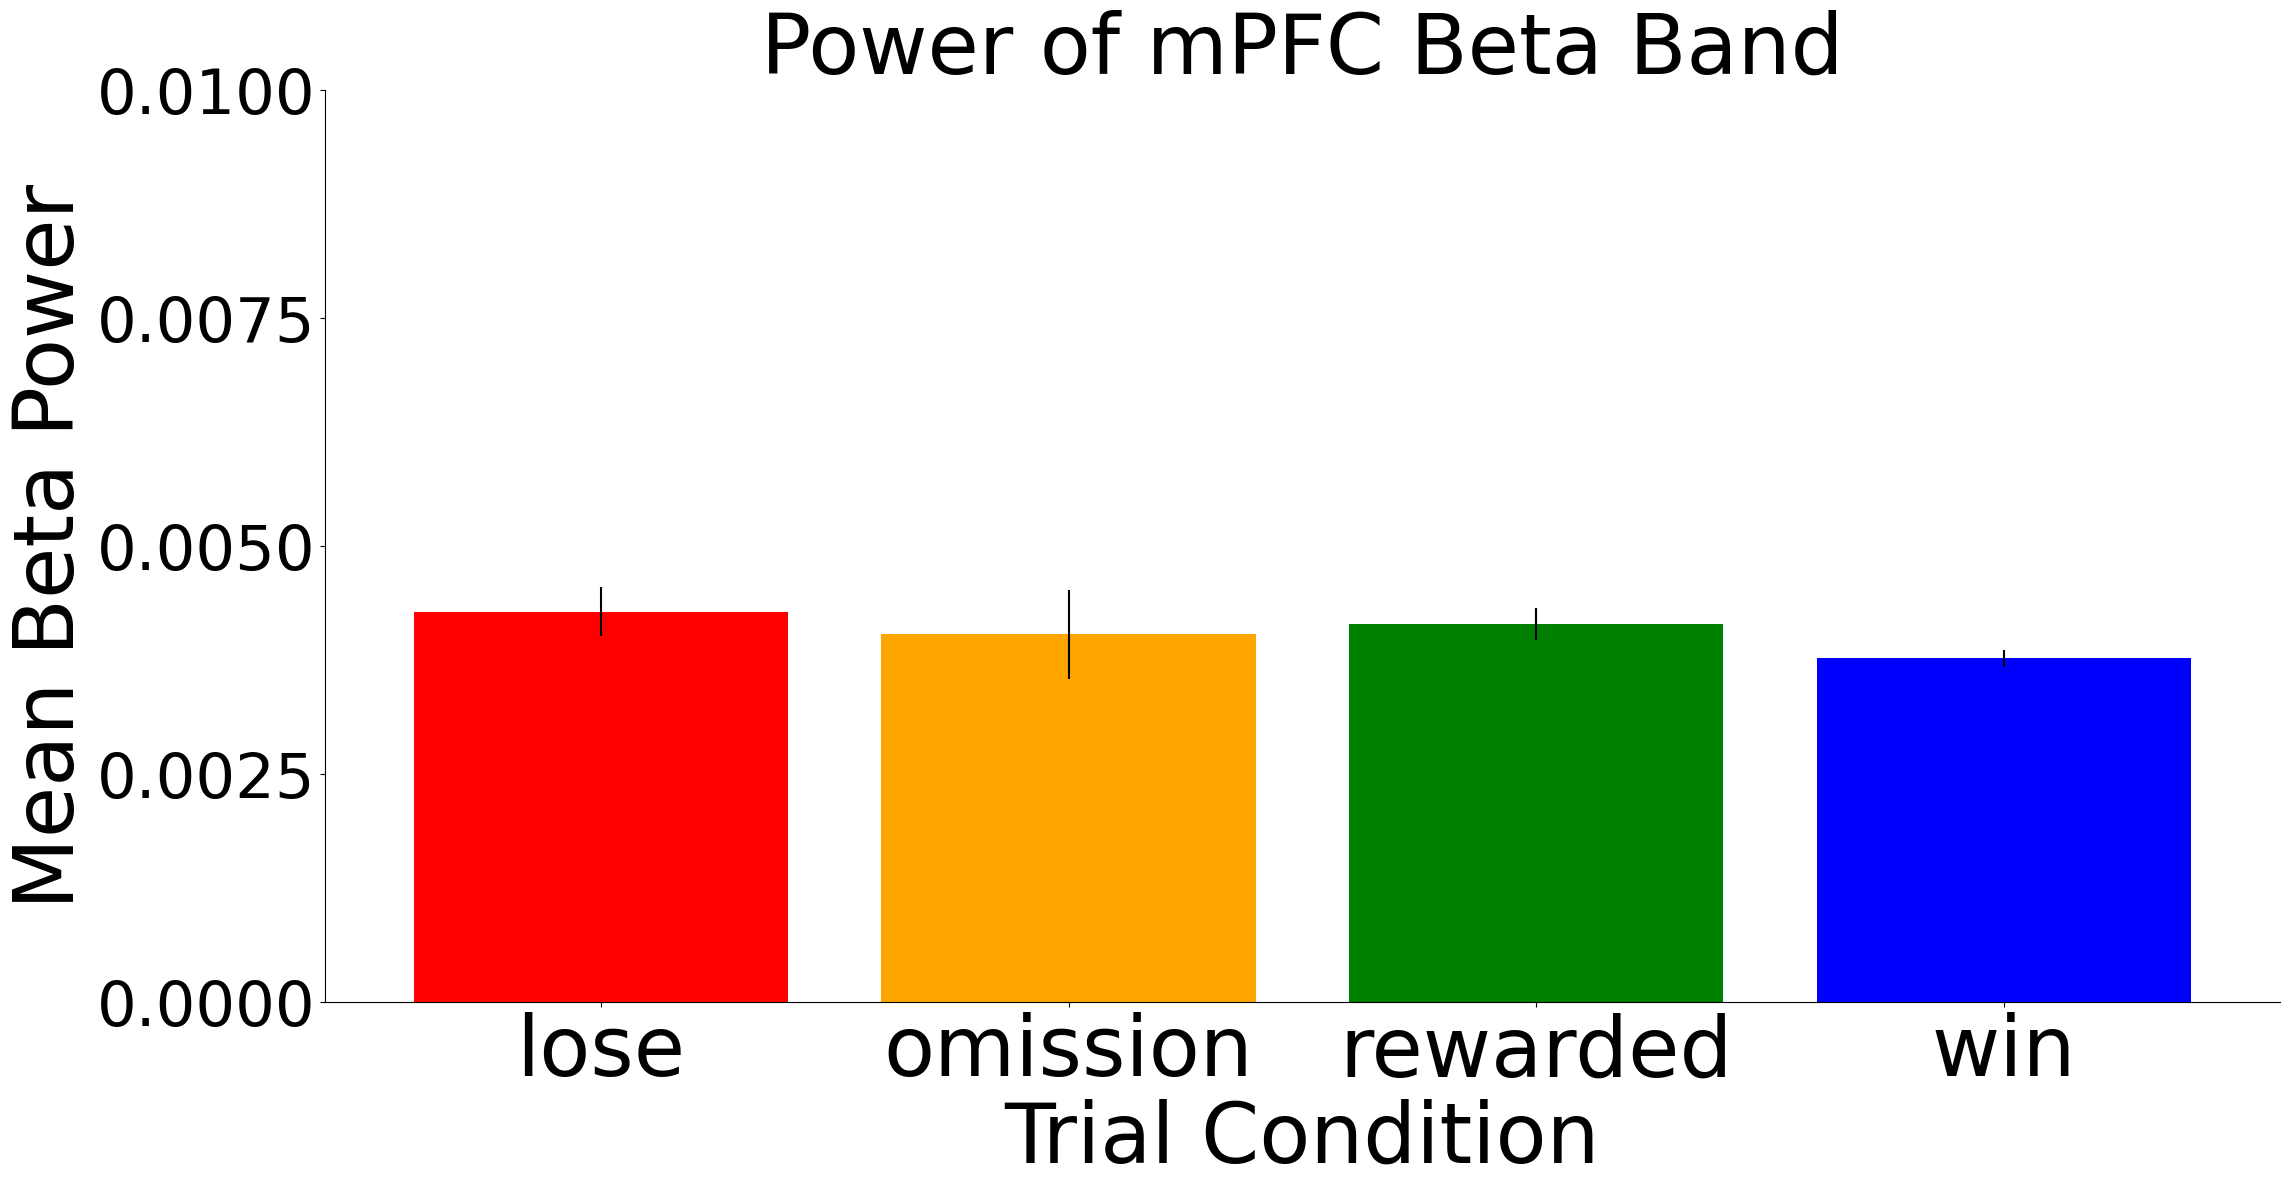

Processing for region: vHPC, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.6039801983242211
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: vHPC, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.0015205724710762522
Processing for region: vHPC, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 2.0143664487493743e-06


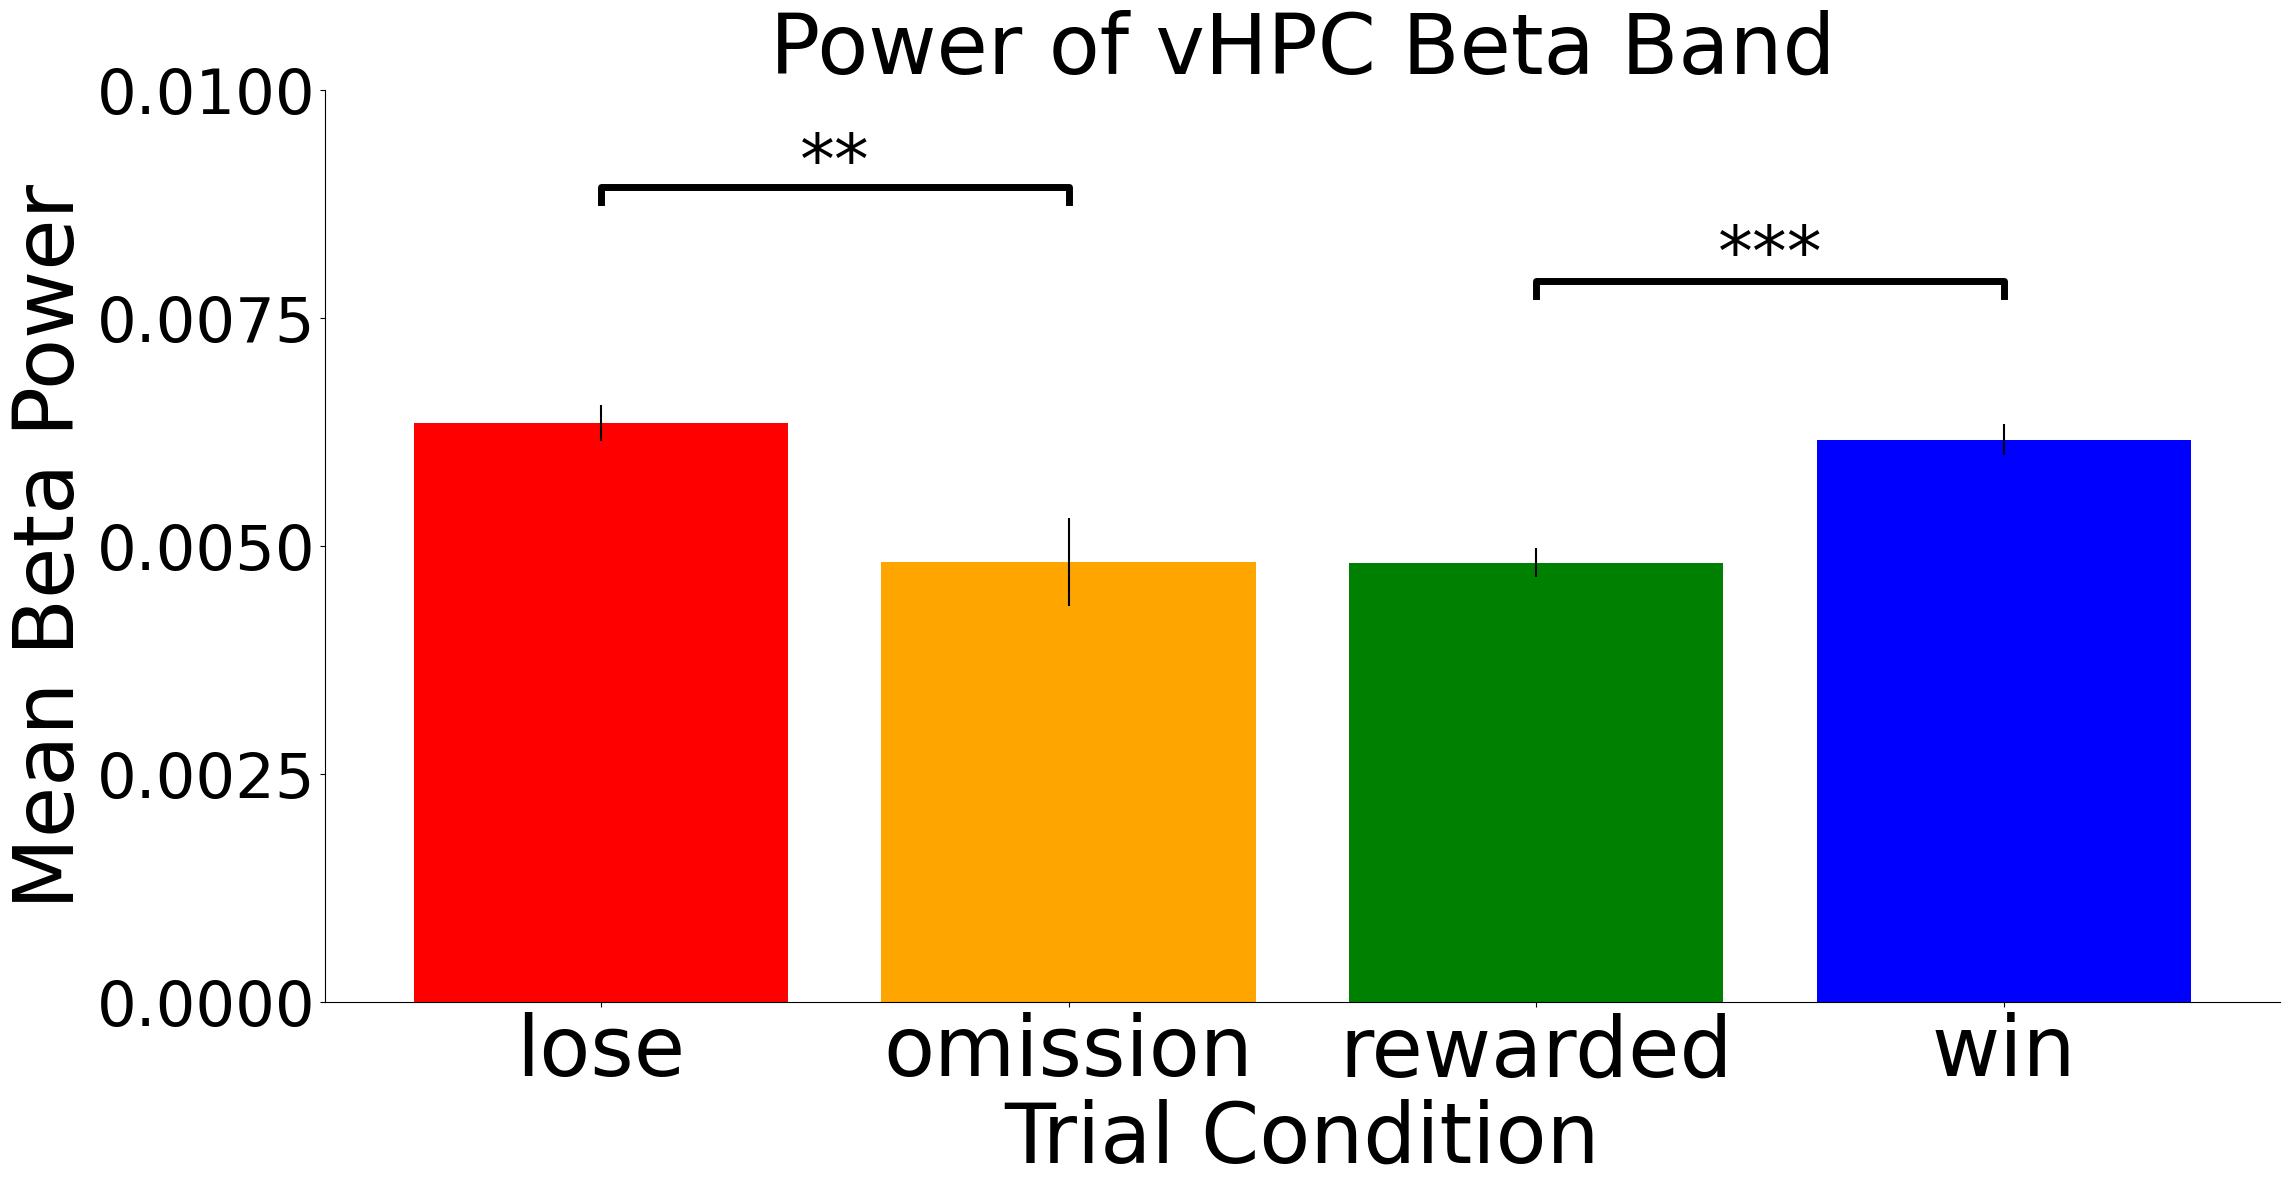

In [ ]:
## TODO: REMOVE THIS COPY FOR TESTING
import numpy as np

for region in mean_power_df["brain_region"].unique():
    fig, ax = plt.subplots(figsize=(23, 12))
    mean_region_df = mean_power_df[(mean_power_df["brain_region"] == region) & (mean_power_df["trial_or_baseline"] == "trial")]
    sem_region_df = sem_power_df[(sem_power_df["brain_region"] == region) & (sem_power_df["trial_or_baseline"] == "trial")]

    colors = [outcome_colors.get(outcome, "gray") for outcome in mean_region_df["trial_outcome"]]
    clean_region_name = region.replace("spike_interface_", "")
    plt.title("Power of {} Beta Band".format(clean_region_name), fontsize=60)
    plt.xlabel("Trial Condition", fontsize=60)
    plt.ylabel("Mean Beta Power", fontsize=60)
    bars = plt.bar(mean_region_df["trial_outcome"], mean_region_df["mean_beta_power"], yerr=sem_region_df["mean_beta_power"], color=colors)
    plt.xticks(fontsize=60)
    plt.yticks(fontsize=45)
    plt.locator_params(axis='y', nbins=4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    comparisons = [("win", "lose"), ("lose", "omission"), ("win", "rewarded")]

    # Get the y-axis limits
    bottom, top = ax.get_ylim()
    y_range = top - bottom

    # Retrieve x-coordinates of the bars
    x_coords = [bar.get_x() + bar.get_width() / 2.0 for bar in bars]  # get_x() retrieves the left coordinate, we adjust by half the width to get the center
    group_to_x_coord = {group: x_coord for group, x_coord in zip(mean_region_df["trial_outcome"].values, x_coords)}


    for i, (outcome1, outcome2) in enumerate(comparisons):
        print(f"Processing for region: {region}, outcome1: {outcome1}, outcome2: {outcome2}")

        data1 = speed_filtered_all_trials_df[(speed_filtered_all_trials_df["brain_region"] == region) & (speed_filtered_all_trials_df["trial_outcome"] == outcome1)]["mean_beta_power"]
        data2 = speed_filtered_all_trials_df[(speed_filtered_all_trials_df["brain_region"] == region) & (speed_filtered_all_trials_df["trial_outcome"] == outcome2)]["mean_beta_power"]


        # data1 = data1[~np.isnan(data1)]
        # data2 = data2[~np.isnan(data2)]

        print(f"Comparison: {outcome1} vs {outcome2}")

        if len(data1) > 0 and len(data2) > 0:
            # Perform Mann-Whitney U test
            _, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
            print("P-value:", p_value)

            bonferroni_threshold = 0.05 / len(comparisons)

            if p_value < bonferroni_threshold:
                

                if p_value < 0.001 / len(comparisons):
                    sig_symbol = '***'
                elif p_value < 0.01 / len(comparisons):
                    sig_symbol = '**'
                elif p_value < 0.05 / len(comparisons):
                    sig_symbol = '*'
                else:
                    continue

                
                x1 = outcome1
                x2 = outcome2
                # What level is this bar among the bars above the plot?
                level = len(comparisons) - i
                # Plot the bar
                bar_height = (y_range * 0.15 * level) + top
                bar_tips = bar_height - (y_range * 0.025)
                plt.plot(
                    [x1, x1, x2, x2],
                    [bar_tips, bar_height, bar_height, bar_tips], lw=5, c='k'
                )
                
                text_height = bar_height * 0.98 + (y_range / 100)
                plt.text((group_to_x_coord[x1] + group_to_x_coord[x2]) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', size=50)



            else:
                print("Skipping Mann-Whitney U test as one or both datasets are empty.")
    plt.ylim(0, 0.01)
    plt.tight_layout()

    plt.savefig("/work/proc/velocity_parsed_power/{}_{}_velocity_parsed_lfp_power.eps".format(region, "beta"))
    plt.savefig("/work/proc/velocity_parsed_power/{}_{}_velocity_parsed_lfp_power.png".format(region, "beta"))


    plt.show()


In [ ]:
mean_power_df = pd.DataFrame(speed_filtered_all_trials_df.groupby(['brain_region', 'trial_outcome', 'trial_or_baseline'])["mean_gamma_power"].mean()).reset_index()

In [ ]:
sem_power_df = pd.DataFrame(speed_filtered_all_trials_df.groupby(['brain_region', 'trial_outcome', 'trial_or_baseline'])["mean_gamma_power"].sem()).reset_index()

Processing for region: BLA, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 3.8802301866597005e-05
Processing for region: BLA, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.3715305154275018
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: BLA, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.08563943746379982
Skipping Mann-Whitney U test as one or both datasets are empty.


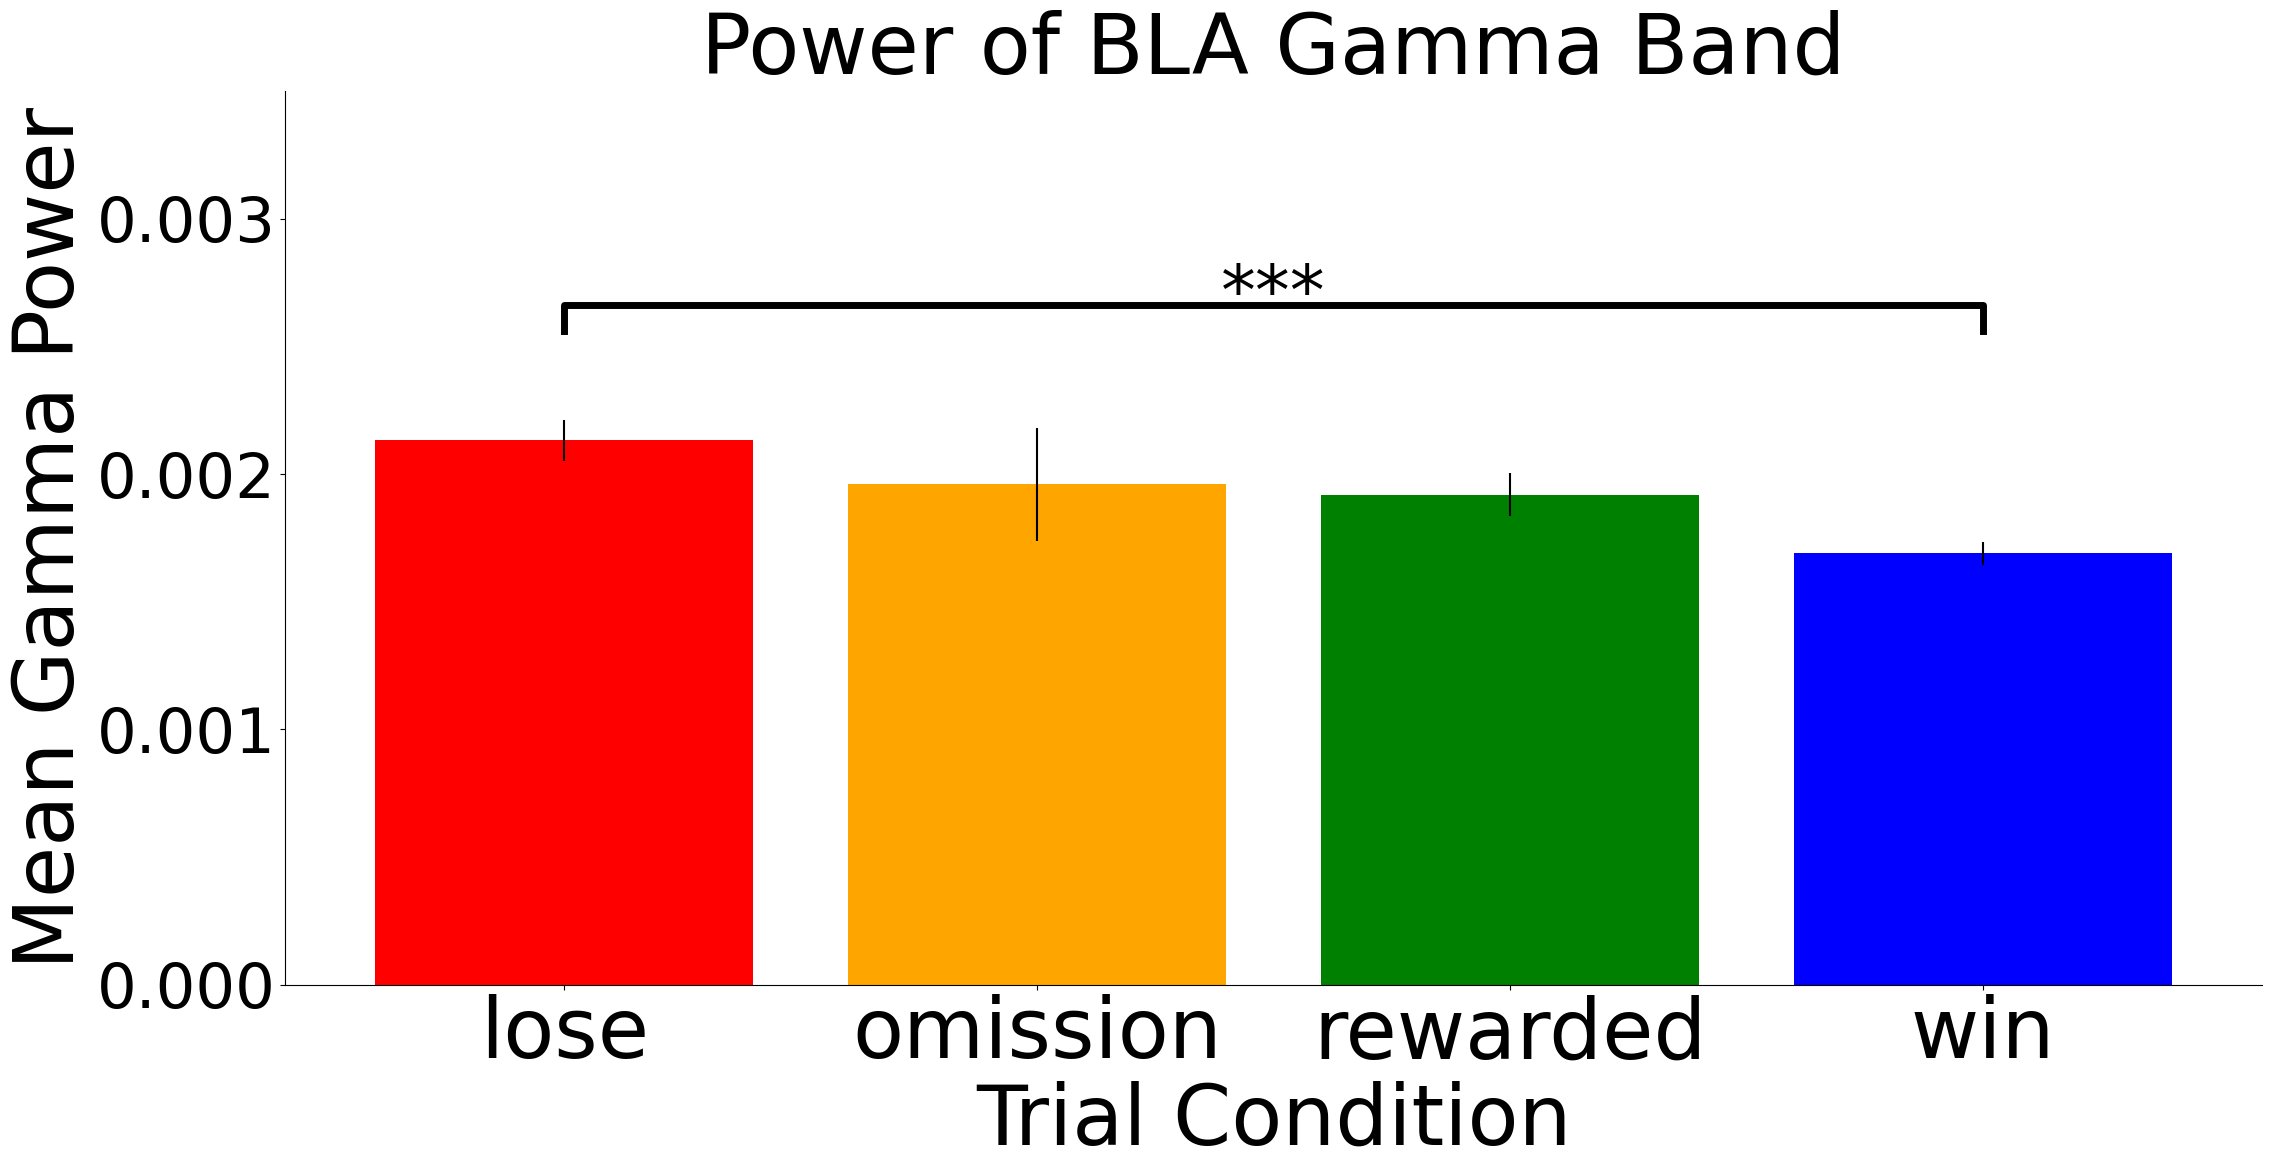

Processing for region: LH, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.0003783477137629843
Processing for region: LH, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.0007264723534066514
Processing for region: LH, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.162787686874313
Skipping Mann-Whitney U test as one or both datasets are empty.


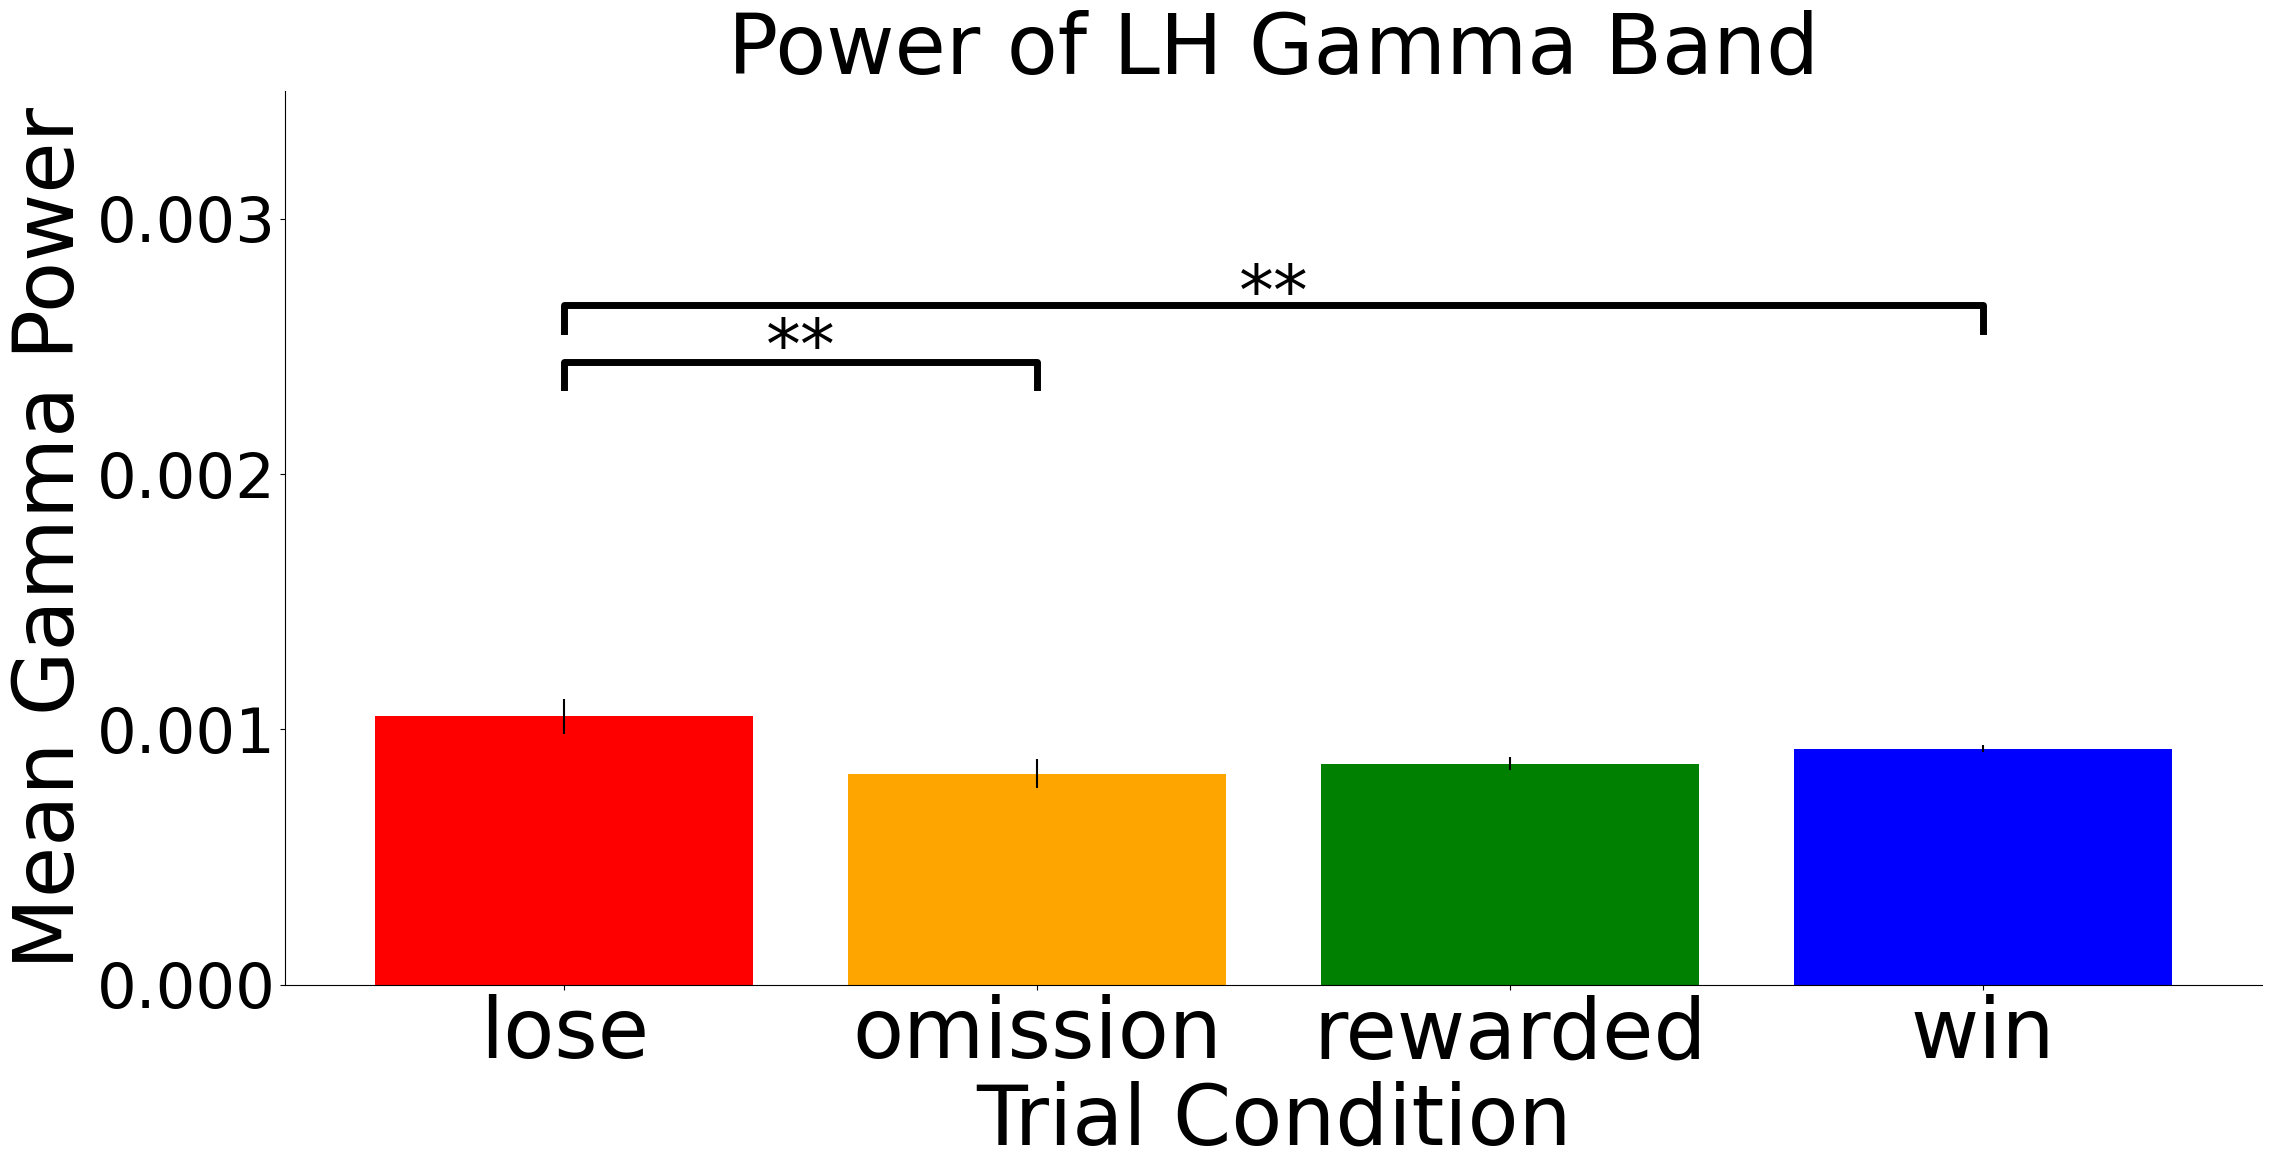

Processing for region: MD, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 2.2331063478196423e-10
Processing for region: MD, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.014126683189815243
Processing for region: MD, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.031123413424734125
Skipping Mann-Whitney U test as one or both datasets are empty.


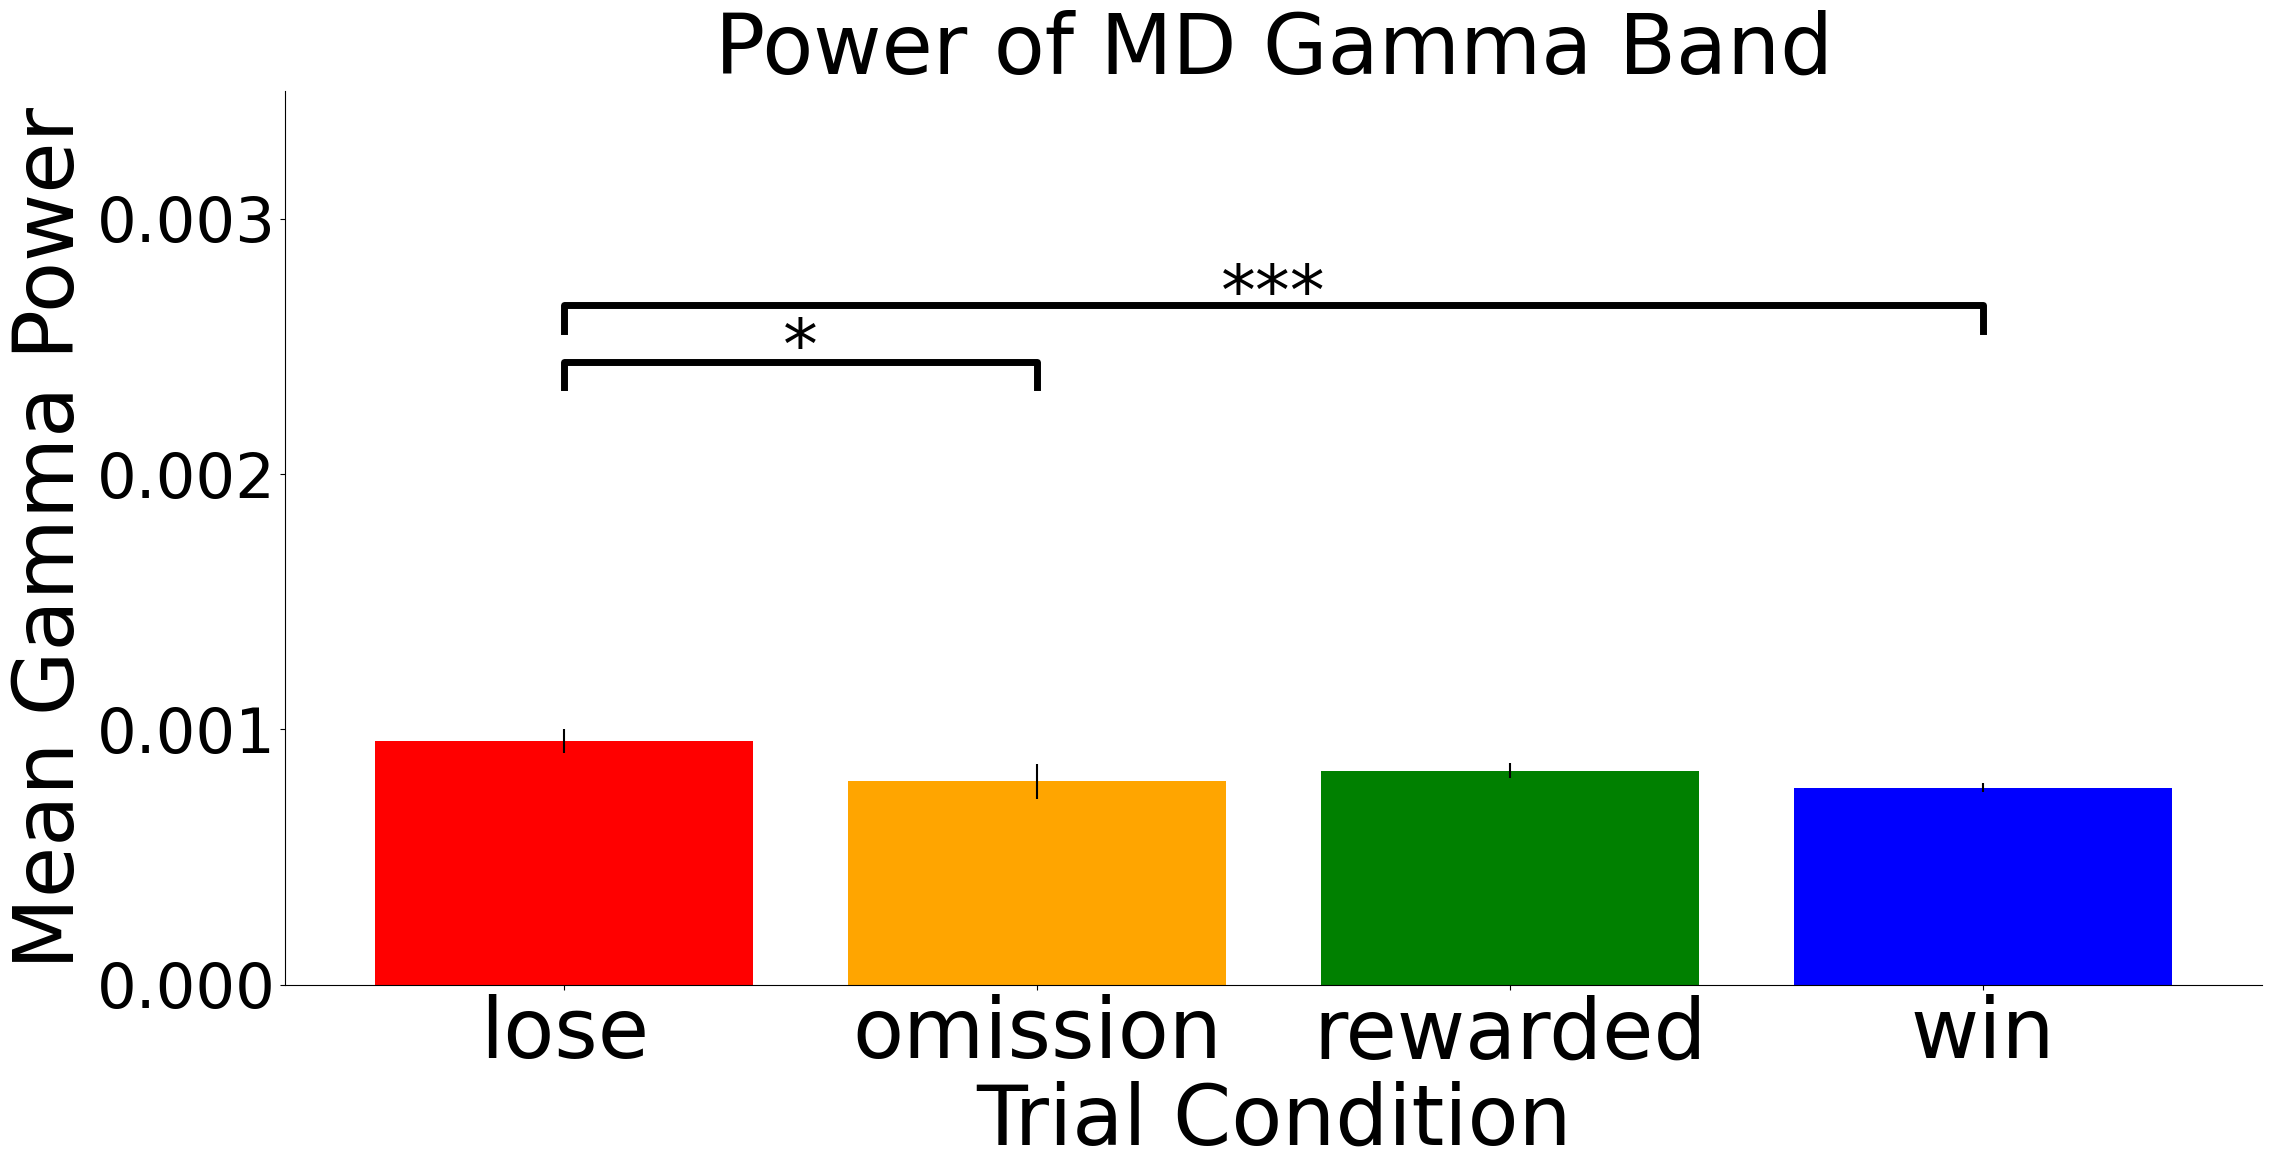

Processing for region: mPFC, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.7505578284044745
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: mPFC, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.4819969978336215
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: mPFC, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.011186643728292726


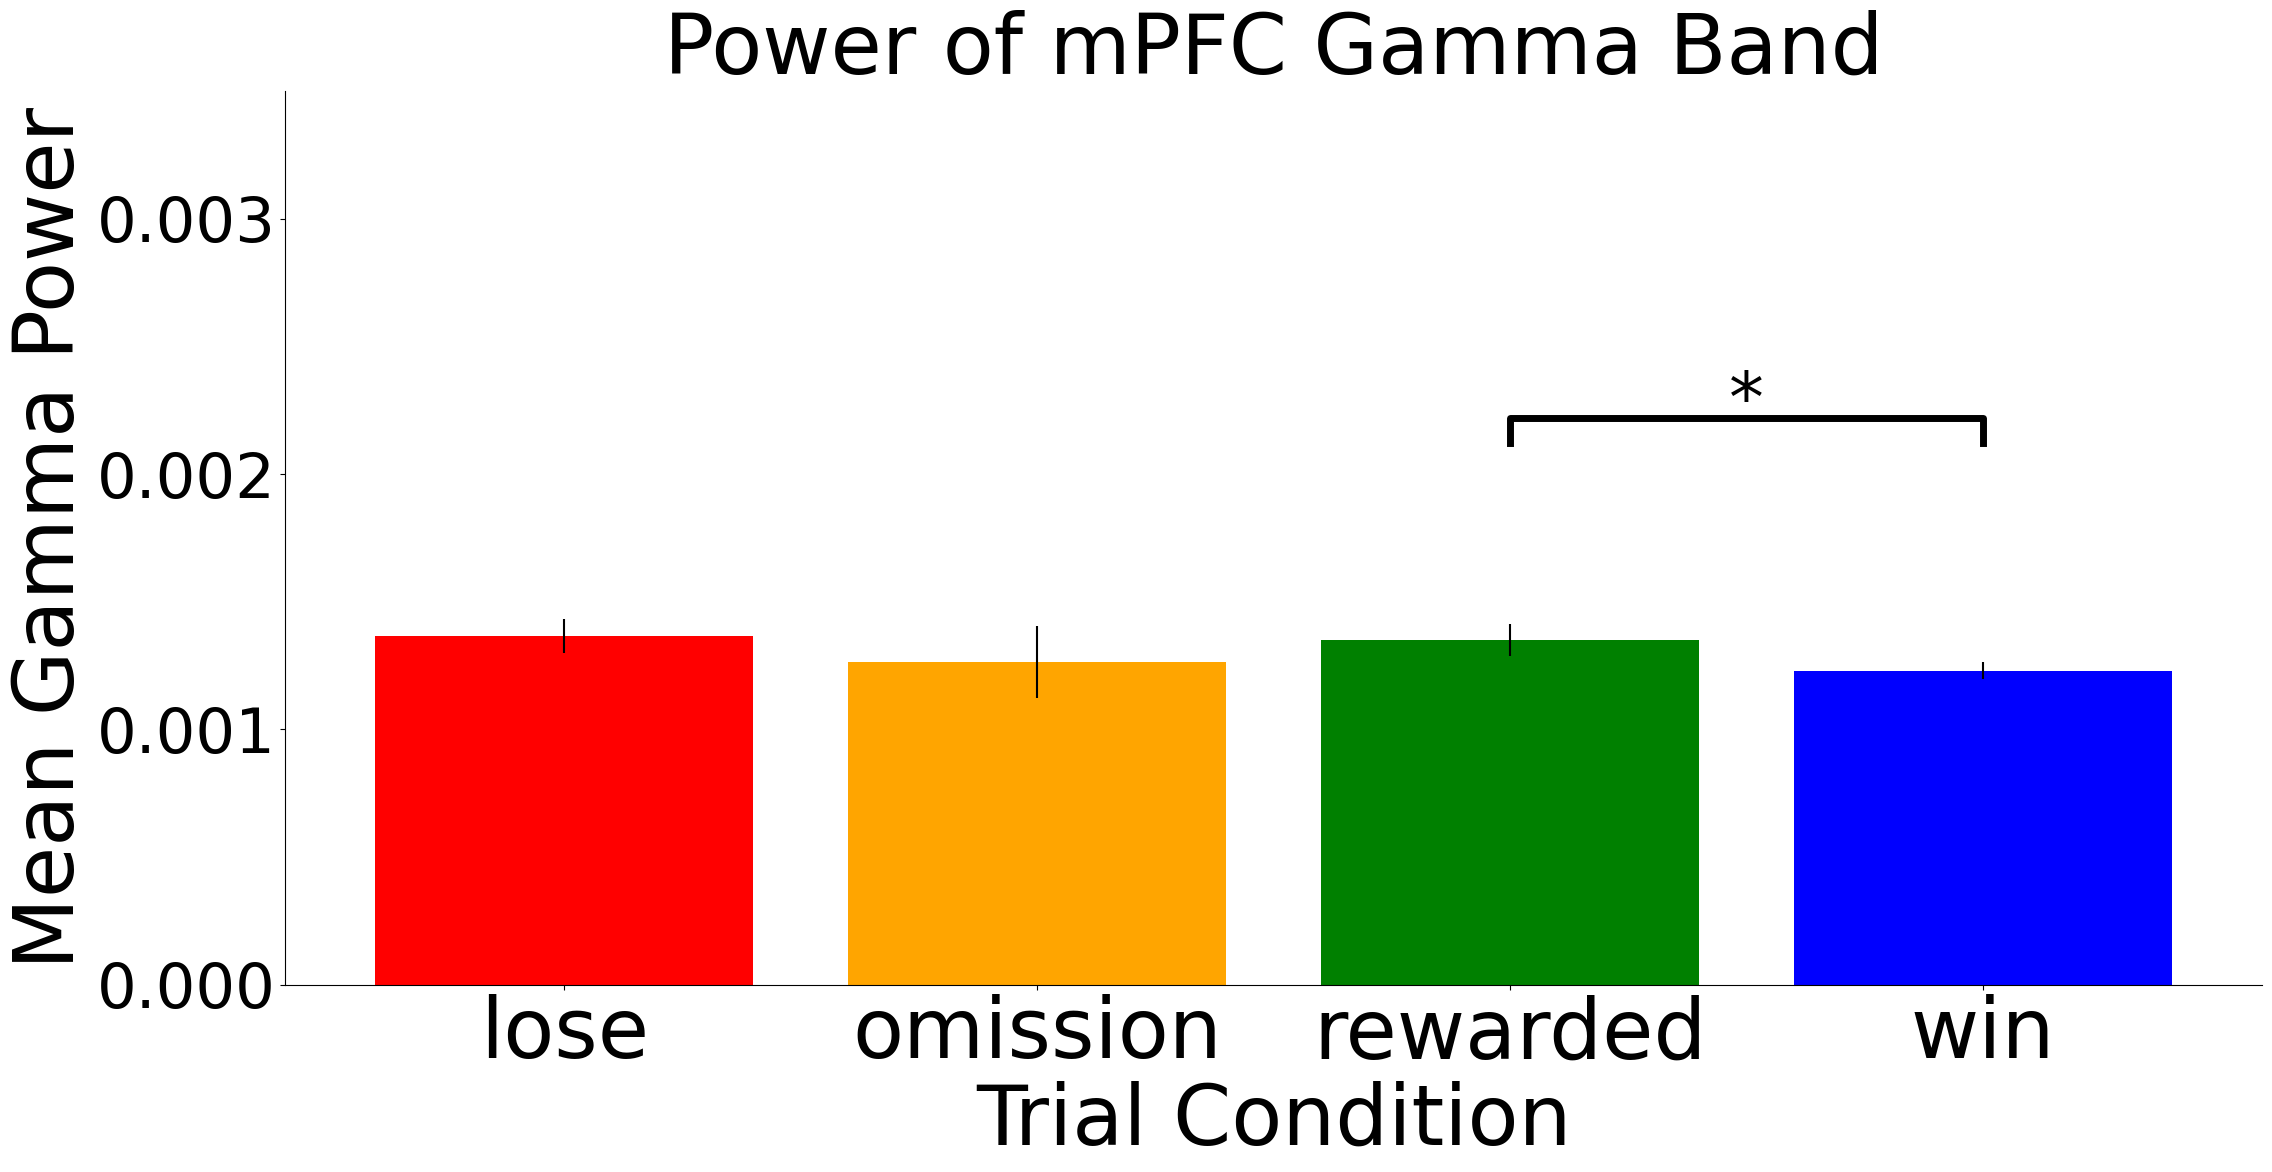

Processing for region: vHPC, outcome1: win, outcome2: lose
Comparison: win vs lose
P-value: 0.05245679437631002
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: vHPC, outcome1: lose, outcome2: omission
Comparison: lose vs omission
P-value: 0.16650912680021446
Skipping Mann-Whitney U test as one or both datasets are empty.
Processing for region: vHPC, outcome1: win, outcome2: rewarded
Comparison: win vs rewarded
P-value: 0.8808362145827154
Skipping Mann-Whitney U test as one or both datasets are empty.


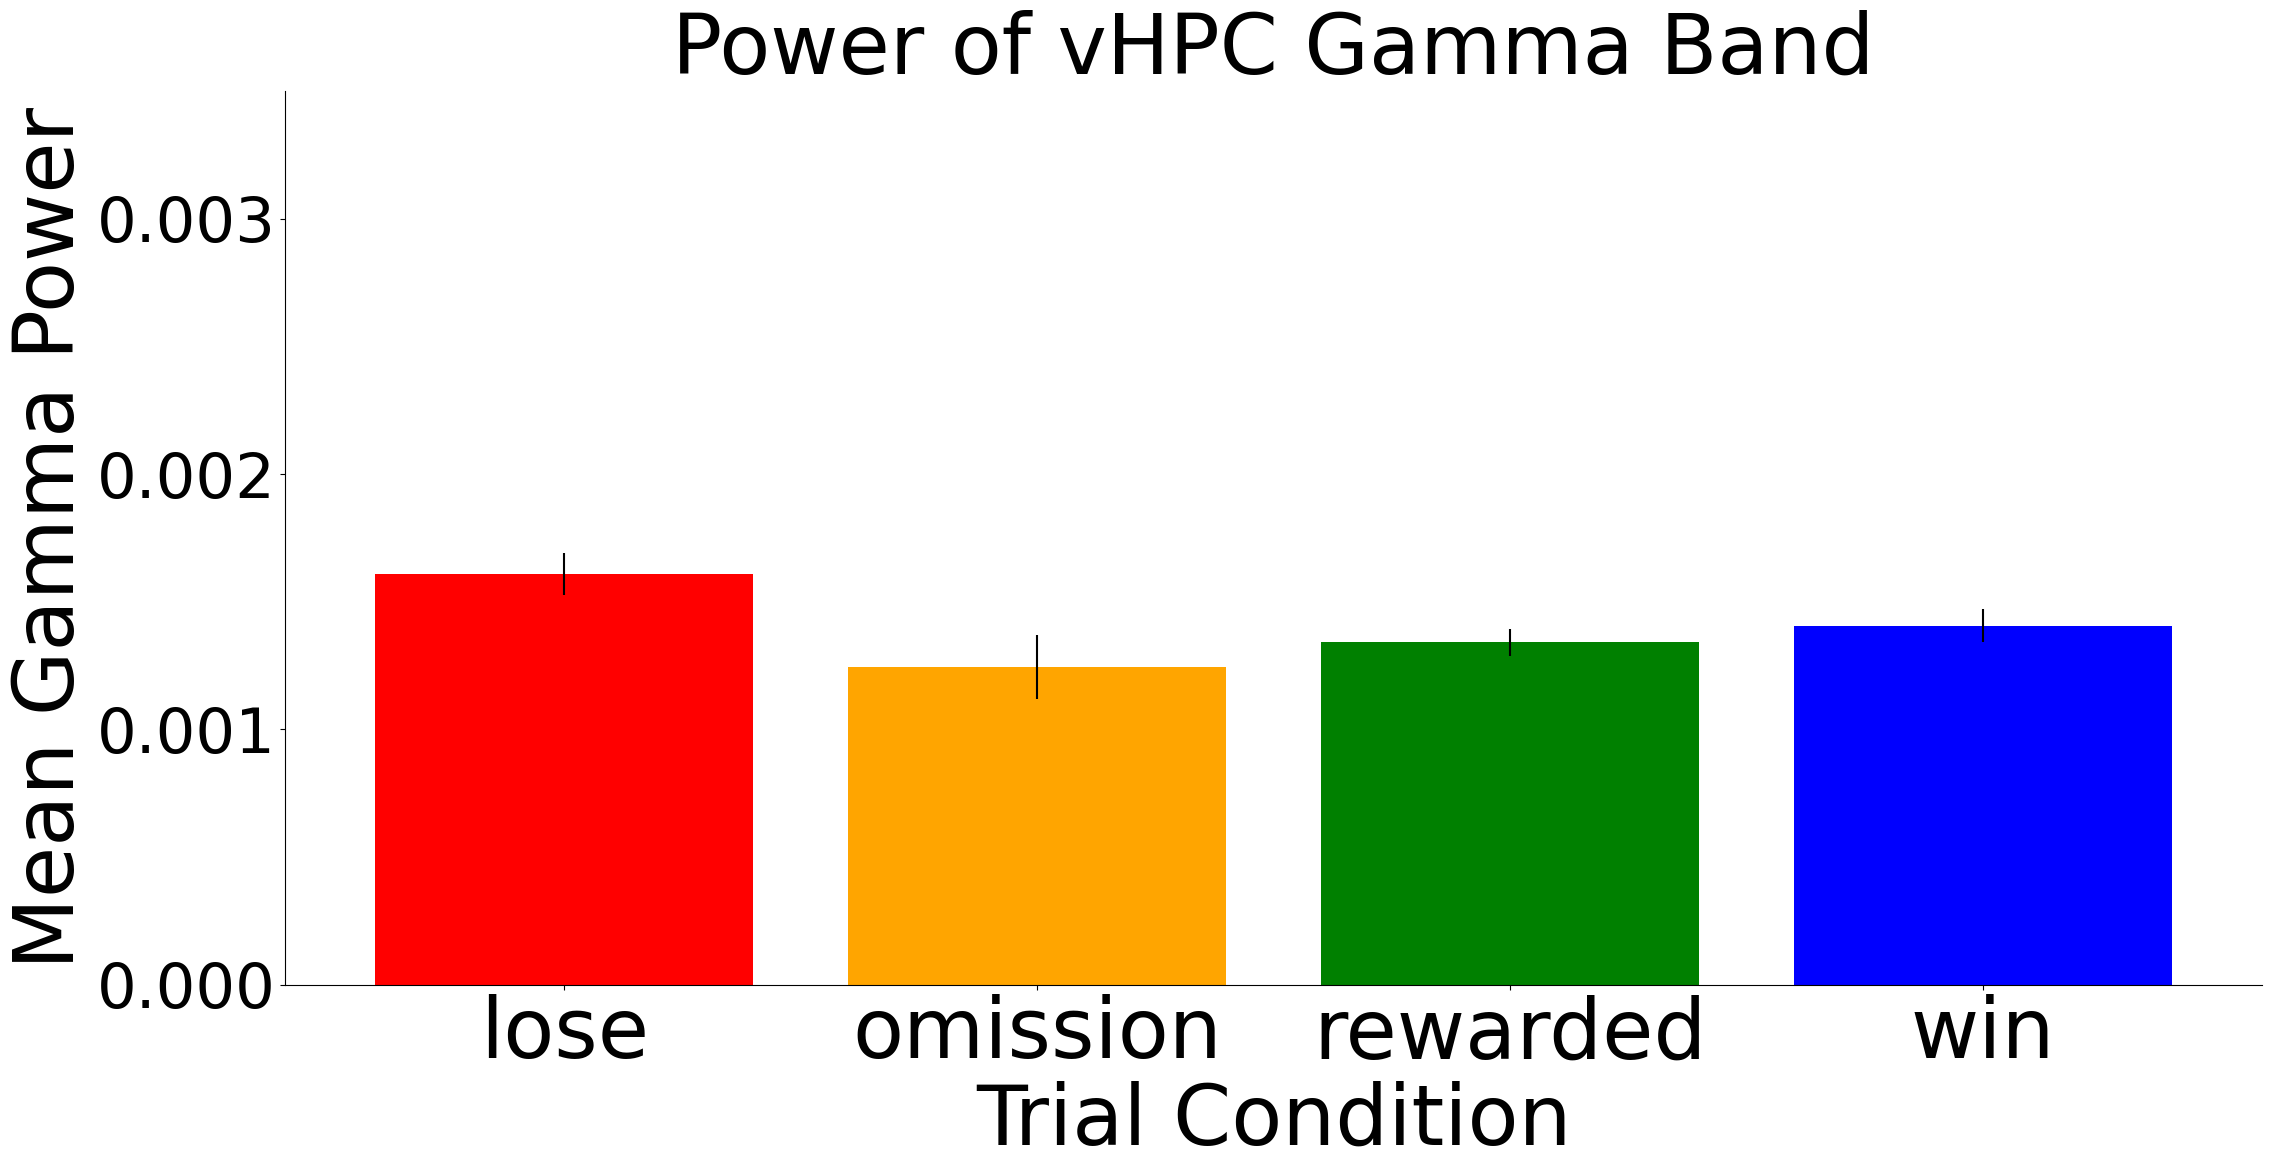

In [ ]:
## TODO: REMOVE THIS COPY FOR TESTING
import numpy as np

for region in mean_power_df["brain_region"].unique():
    fig, ax = plt.subplots(figsize=(23, 12))
    mean_region_df = mean_power_df[(mean_power_df["brain_region"] == region) & (mean_power_df["trial_or_baseline"] == "trial")]
    sem_region_df = sem_power_df[(sem_power_df["brain_region"] == region) & (sem_power_df["trial_or_baseline"] == "trial")]

    colors = [outcome_colors.get(outcome, "gray") for outcome in mean_region_df["trial_outcome"]]
    clean_region_name = region.replace("spike_interface_", "")
    plt.title("Power of {} Gamma Band".format(clean_region_name), fontsize=60)
    plt.xlabel("Trial Condition", fontsize=60)
    plt.ylabel("Mean Gamma Power", fontsize=60)
    bars = plt.bar(mean_region_df["trial_outcome"], mean_region_df["mean_gamma_power"], yerr=sem_region_df["mean_gamma_power"], color=colors)
    plt.xticks(fontsize=60)
    plt.yticks(fontsize=45)
    plt.locator_params(axis='y', nbins=4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    comparisons = [("win", "lose"), ("lose", "omission"), ("win", "rewarded")]
    plt.ylim(0, 0.004)
    # Get the y-axis limits
    bottom, top = ax.get_ylim()
    y_range = top - bottom

    # Retrieve x-coordinates of the bars
    x_coords = [bar.get_x() + bar.get_width() / 2.0 for bar in bars]  # get_x() retrieves the left coordinate, we adjust by half the width to get the center
    group_to_x_coord = {group: x_coord for group, x_coord in zip(mean_region_df["trial_outcome"].values, x_coords)}


    for i, (outcome1, outcome2) in enumerate(comparisons):
        print(f"Processing for region: {region}, outcome1: {outcome1}, outcome2: {outcome2}")

        data1 = speed_filtered_all_trials_df[(speed_filtered_all_trials_df["brain_region"] == region) & (speed_filtered_all_trials_df["trial_outcome"] == outcome1)]["mean_gamma_power"]
        data2 = speed_filtered_all_trials_df[(speed_filtered_all_trials_df["brain_region"] == region) & (speed_filtered_all_trials_df["trial_outcome"] == outcome2)]["mean_gamma_power"]

        # Flatten the arrays
        # data1 = np.concatenate(data1).ravel()
        # data2 = np.concatenate(data2).ravel()

        # data1 = data1[~np.isnan(data1)]
        # data2 = data2[~np.isnan(data2)]

        print(f"Comparison: {outcome1} vs {outcome2}")

        if len(data1) > 0 and len(data2) > 0:
            # Perform Mann-Whitney U test
            _, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
            print("P-value:", p_value)

            bonferroni_threshold = 0.05 / len(comparisons)

            if p_value < bonferroni_threshold:
                

                if p_value < 0.001 / len(comparisons):
                    sig_symbol = '***'
                elif p_value < 0.01 / len(comparisons):
                    sig_symbol = '**'
                elif p_value < 0.05 / len(comparisons):
                    sig_symbol = '*'
                else:
                    continue

                
                x1 = outcome1
                x2 = outcome2
                # What level is this bar among the bars above the plot?
                level = len(comparisons) - i
                # Plot the bar
                bar_height = (y_range * 0.055 * level) + top * 0.5
                bar_tips = bar_height - (y_range * 0.025)
                plt.plot(
                    [x1, x1, x2, x2],
                    [bar_tips, bar_height, bar_height, bar_tips], lw=5, c='k'
                )
                
                text_height = bar_height * 0.95 + (y_range / 100)
                plt.text((group_to_x_coord[x1] + group_to_x_coord[x2]) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', size=50)



            else:
                print("Skipping Mann-Whitney U test as one or both datasets are empty.")
    plt.ylim(0, 0.0035)
    plt.tight_layout()
    plt.savefig("/work/proc/velocity_parsed_power/{}_{}_velocity_parsed_lfp_power.eps".format(region, "gamma"))
    plt.savefig("/work/proc/velocity_parsed_power/{}_{}_velocity_parsed_lfp_power.png".format(region, "gamma"))

    plt.show()


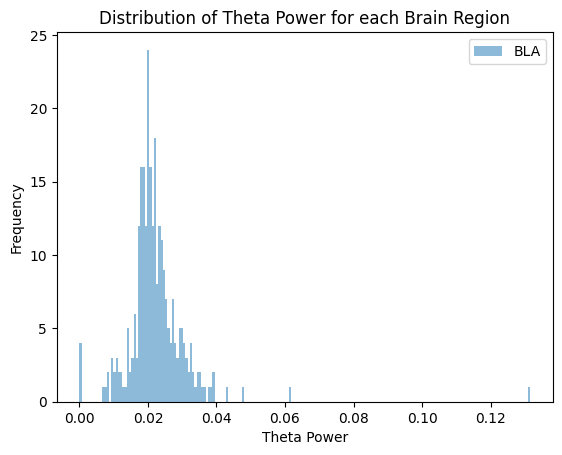

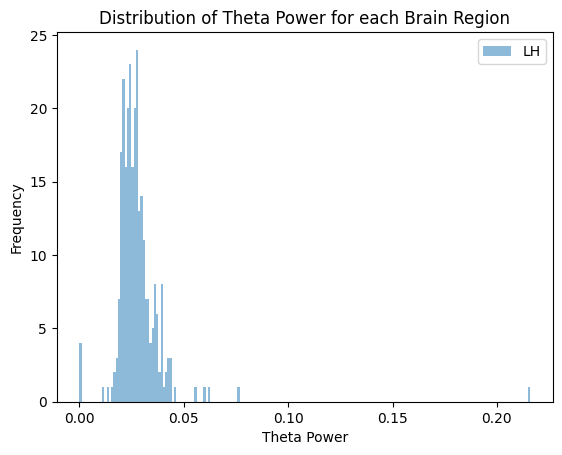

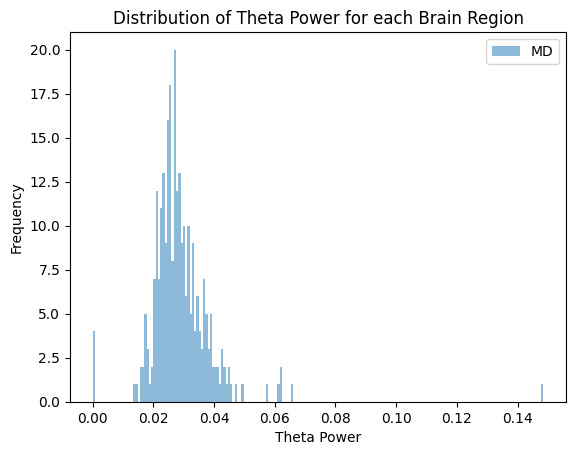

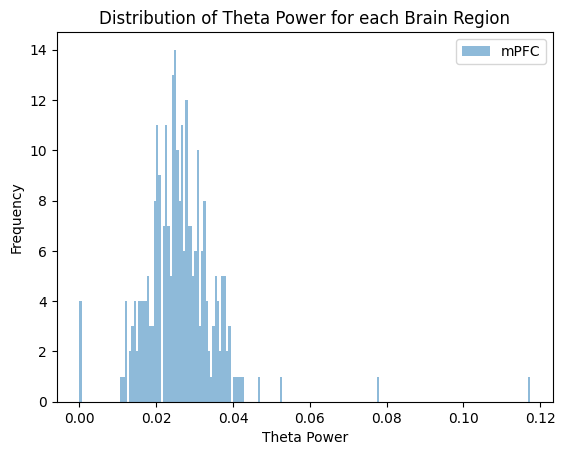

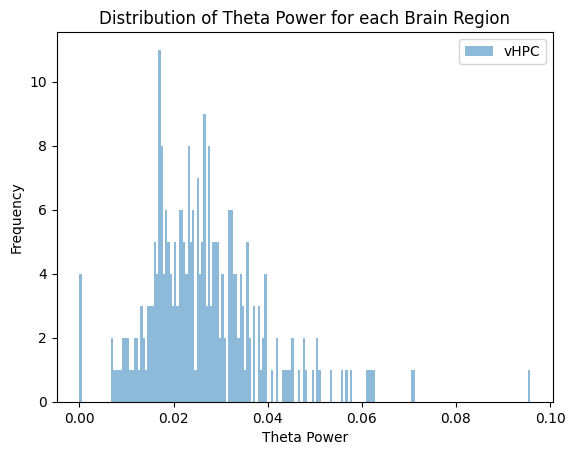

In [ ]:

for region in mean_power_df["brain_region"].unique():

    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df["brain_region"] == region]["mean_theta_power"]
    
    #flattened_data = [item for sublist in region_data.dropna() for item in sublist]
    
    # Plot histogram
    plt.hist(region_data, bins=200, alpha=0.5, label=region)
    plt.xlabel('Theta Power')
    plt.ylabel('Frequency')
    plt.title('Distribution of Theta Power for each Brain Region')
    plt.legend(loc='upper right')
    plt.show()



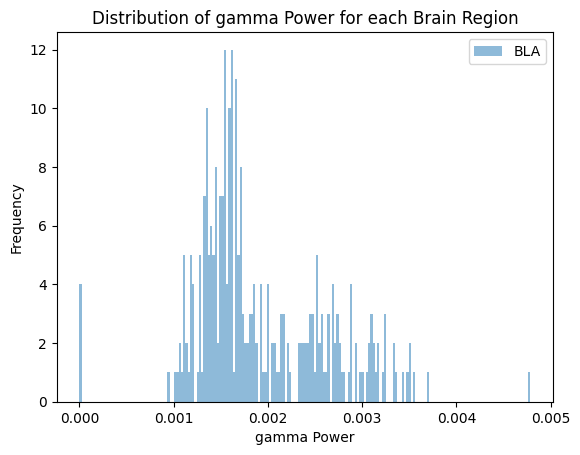

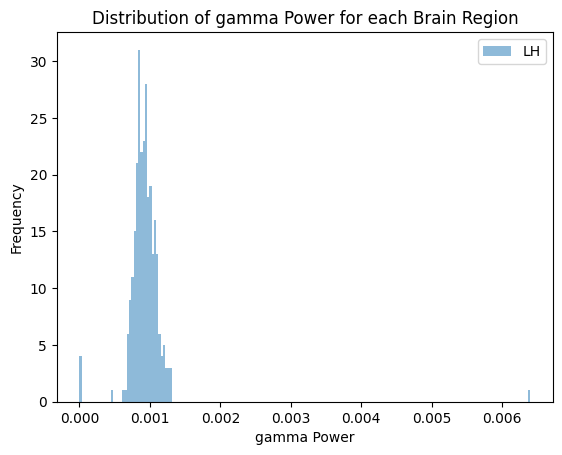

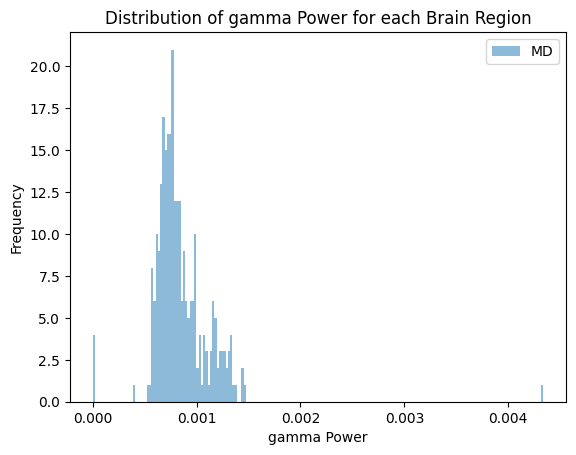

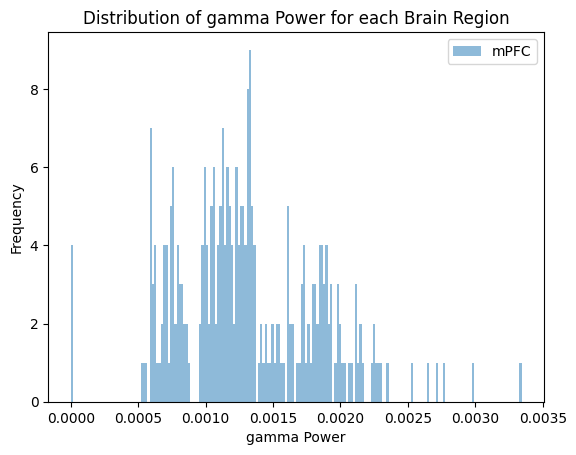

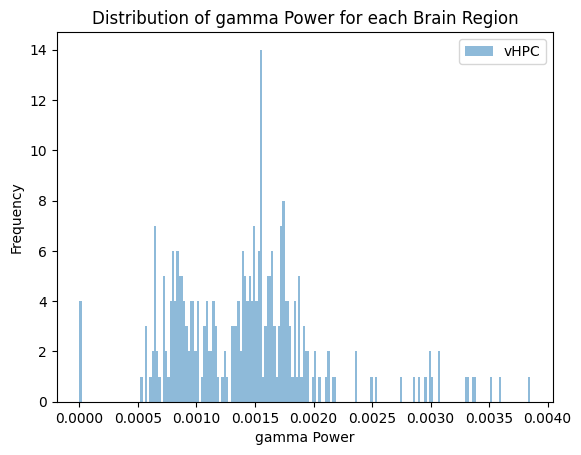

In [ ]:

for region in mean_power_df["brain_region"].unique():

    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df["brain_region"] == region]["mean_gamma_power"]
    
    #flattened_data = [item for sublist in region_data.dropna() for item in sublist]
    
    # Plot histogram
    plt.hist(region_data, bins=200, alpha=0.5, label=region)
    plt.xlabel('gamma Power')
    plt.ylabel('Frequency')
    plt.title('Distribution of gamma Power for each Brain Region')
    plt.legend(loc='upper right')
    plt.show()

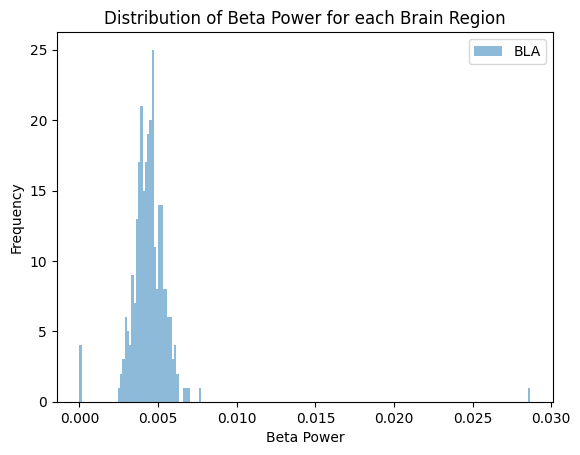

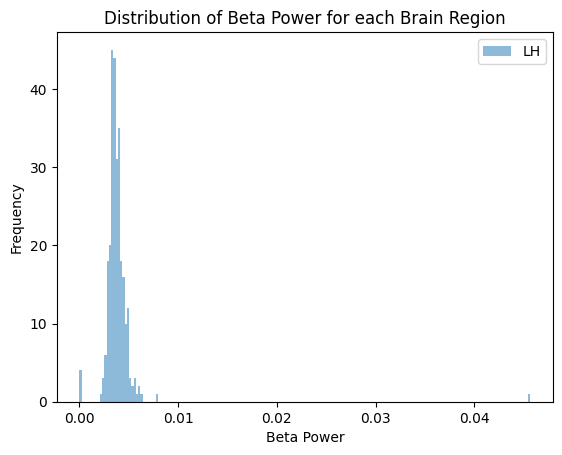

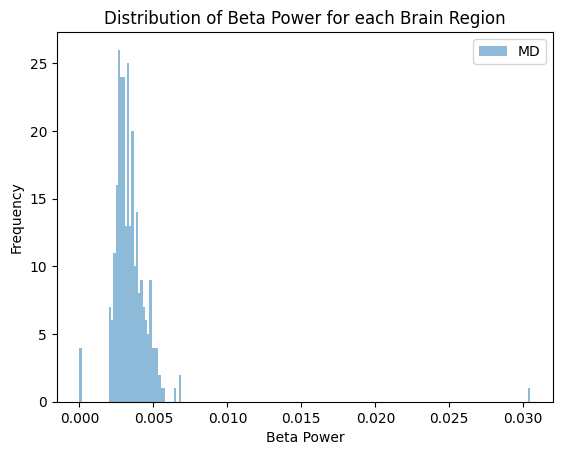

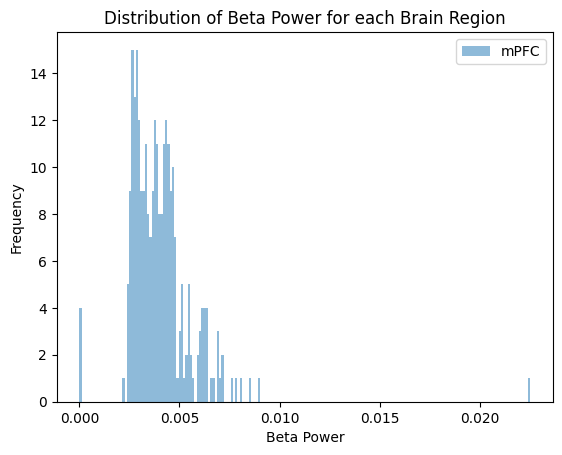

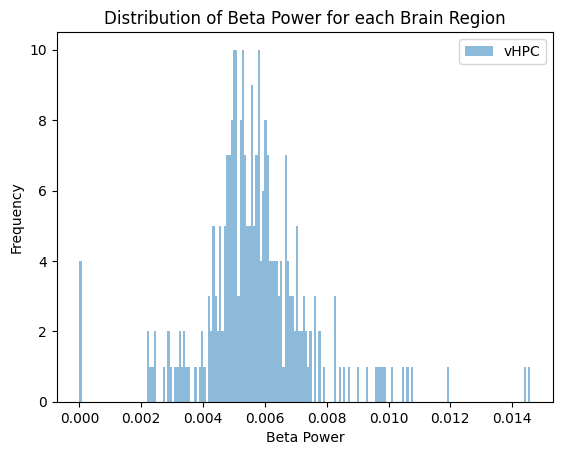

In [ ]:

for region in mean_power_df["brain_region"].unique():

    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df["brain_region"] == region]["mean_beta_power"]
    
    #flattened_data = [item for sublist in region_data.dropna() for item in sublist]
    
    # Plot histogram
    plt.hist(region_data, bins=200, alpha=0.5, label=region)
    plt.xlabel('Beta Power')
    plt.ylabel('Frequency')
    plt.title('Distribution of Beta Power for each Brain Region')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
from scipy.stats import kruskal

## 

In [ ]:
theta_outcome_plots = []
for region in speed_filtered_all_trials_df["brain_region"].unique():
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df["brain_region"] == region]

    grouped_data = [region_data[region_data['trial_outcome'] == trial_outcome]['mean_theta_power'] for trial_outcome in region_data['trial_outcome'].unique()]
    statistic, p_value = kruskal(*grouped_data)
    theta_outcome_plots.append(statistic)
    print("Kruskal-Wallis H Test Results for Mean Theta Power:")
    print(f"  Kruskal-Wallis H test statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")

Brain Region: mPFC
Kruskal-Wallis H Test Results for Mean Theta Power:
  Kruskal-Wallis H test statistic: 15.9054
  p-value: 0.0012
Brain Region: vHPC
Kruskal-Wallis H Test Results for Mean Theta Power:
  Kruskal-Wallis H test statistic: 26.6131
  p-value: 0.0000
Brain Region: BLA
Kruskal-Wallis H Test Results for Mean Theta Power:
  Kruskal-Wallis H test statistic: 33.3710
  p-value: 0.0000
Brain Region: LH
Kruskal-Wallis H Test Results for Mean Theta Power:
  Kruskal-Wallis H test statistic: 36.6342
  p-value: 0.0000
Brain Region: MD
Kruskal-Wallis H Test Results for Mean Theta Power:
  Kruskal-Wallis H test statistic: 29.5063
  p-value: 0.0000


In [ ]:
beta_outcome_plots = []
for region in speed_filtered_all_trials_df["brain_region"].unique():
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df["brain_region"] == region]

    grouped_data = [region_data[region_data['trial_outcome'] == trial_outcome]['mean_beta_power'] for trial_outcome in region_data['trial_outcome'].unique()]
    statistic, p_value = kruskal(*grouped_data)
    beta_outcome_plots.append(statistic)
    print("Kruskal-Wallis H Test Results for Mean Beta Power:")
    print(f"  Kruskal-Wallis H test statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")

Brain Region: mPFC
Kruskal-Wallis H Test Results for Mean Beta Power:
  Kruskal-Wallis H test statistic: 3.3315
  p-value: 0.3433
Brain Region: vHPC
Kruskal-Wallis H Test Results for Mean Beta Power:
  Kruskal-Wallis H test statistic: 36.5599
  p-value: 0.0000
Brain Region: BLA
Kruskal-Wallis H Test Results for Mean Beta Power:
  Kruskal-Wallis H test statistic: 47.4388
  p-value: 0.0000
Brain Region: LH
Kruskal-Wallis H Test Results for Mean Beta Power:
  Kruskal-Wallis H test statistic: 16.4222
  p-value: 0.0009
Brain Region: MD
Kruskal-Wallis H Test Results for Mean Beta Power:
  Kruskal-Wallis H test statistic: 26.5184
  p-value: 0.0000


In [ ]:
gamma_outcome_plots = []
for region in speed_filtered_all_trials_df["brain_region"].unique():
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df["brain_region"] == region]

    grouped_data = [region_data[region_data['trial_outcome'] == trial_outcome]['mean_gamma_power'] for trial_outcome in region_data['trial_outcome'].unique()]
    statistic, p_value = kruskal(*grouped_data)
    gamma_outcome_plots.append(statistic)
    print("Kruskal-Wallis H Test Results for Mean Gamma Power:")
    print(f"  Kruskal-Wallis H test statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")

Brain Region: mPFC
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Kruskal-Wallis H test statistic: 3.4337
  p-value: 0.3295
Brain Region: vHPC
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Kruskal-Wallis H test statistic: 4.7748
  p-value: 0.1890
Brain Region: BLA
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Kruskal-Wallis H test statistic: 14.4682
  p-value: 0.0023
Brain Region: LH
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Kruskal-Wallis H test statistic: 24.6030
  p-value: 0.0000
Brain Region: MD
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Kruskal-Wallis H test statistic: 34.1483
  p-value: 0.0000


# Brain Region Effect

In [ ]:
gamma_region_plots = []
for trial_outcome in speed_filtered_all_trials_df['trial_outcome'].unique():

    outcome_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['trial_outcome'] == trial_outcome]

    # Group 'mean_gamma_power' by 'brain_region' for this trial outcome
    grouped_data = [outcome_data[outcome_data['brain_region'] == region]['mean_gamma_power'] for region in outcome_data['brain_region'].unique()]

    # Perform the Kruskal-Wallis H test for this trial outcome
    statistic, p_value = kruskal(*grouped_data)

    gamma_region_plots.append(statistic)
    # Print the results for each brain region for this trial outcome
    print("Kruskal-Wallis H Test Results for Mean Gamma Power:")
    print(f"  Trial Outcome: {trial_outcome}")
    print(f"    Kruskal-Wallis H test statistic: {statistic:.4f}")
    print(f"    p-value: {p_value:.4f}")
    #print(gamma_region_plots)


Kruskal-Wallis H Test Results for Mean Gamma Power:
  Trial Outcome: win
    Kruskal-Wallis H test statistic: 276.4856
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Trial Outcome: lose
    Kruskal-Wallis H test statistic: 158.7450
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Trial Outcome: rewarded
    Kruskal-Wallis H test statistic: 163.7712
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Gamma Power:
  Trial Outcome: omission
    Kruskal-Wallis H test statistic: 28.3706
    p-value: 0.0000


In [ ]:
theta_region_plots = []
for trial_outcome in speed_filtered_all_trials_df['trial_outcome'].unique():

    outcome_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['trial_outcome'] == trial_outcome]

    grouped_data = [outcome_data[outcome_data['brain_region'] == region]['mean_theta_power'] for region in outcome_data['brain_region'].unique()]

    # Perform the Kruskal-Wallis H test for this trial outcome
    statistic, p_value = kruskal(*grouped_data)
    theta_region_plots.append(statistic)
    # Print the results for each brain region for this trial outcome
    print("Kruskal-Wallis H Test Results for Mean Theta Power:")
    print(f"  Trial Outcome: {trial_outcome}")
    print(f"    Kruskal-Wallis H test statistic: {statistic:.4f}")
    print(f"    p-value: {p_value:.4f}")

Kruskal-Wallis H Test Results for Mean Theta Power:
  Trial Outcome: win
    Kruskal-Wallis H test statistic: 79.2209
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Theta Power:
  Trial Outcome: lose
    Kruskal-Wallis H test statistic: 39.7792
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Theta Power:
  Trial Outcome: rewarded
    Kruskal-Wallis H test statistic: 40.7417
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Theta Power:
  Trial Outcome: omission
    Kruskal-Wallis H test statistic: 9.7393
    p-value: 0.0451


In [ ]:
beta_region_plots = []
for trial_outcome in speed_filtered_all_trials_df['trial_outcome'].unique():

    outcome_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['trial_outcome'] == trial_outcome]

    # Group 'mean_gamma_power' by 'brain_region' for this trial outcome
    grouped_data = [outcome_data[outcome_data['brain_region'] == region]['mean_beta_power'] for region in outcome_data['brain_region'].unique()]

    # Perform the Kruskal-Wallis H test for this trial outcome
    statistic, p_value = kruskal(*grouped_data)
    beta_region_plots.append(statistic)
    # Print the results for each brain region for this trial outcome
    print("Kruskal-Wallis H Test Results for Mean Beta Power:")
    print(f"  Trial Outcome: {trial_outcome}")
    print(f"    Kruskal-Wallis H test statistic: {statistic:.4f}")
    print(f"    p-value: {p_value:.4f}")

Kruskal-Wallis H Test Results for Mean Beta Power:
  Trial Outcome: win
    Kruskal-Wallis H test statistic: 294.0047
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Beta Power:
  Trial Outcome: lose
    Kruskal-Wallis H test statistic: 137.5149
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Beta Power:
  Trial Outcome: rewarded
    Kruskal-Wallis H test statistic: 74.2008
    p-value: 0.0000
Kruskal-Wallis H Test Results for Mean Beta Power:
  Trial Outcome: omission
    Kruskal-Wallis H test statistic: 8.9183
    p-value: 0.0632


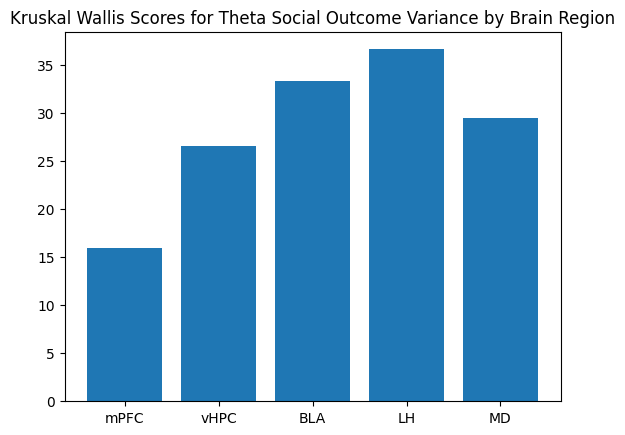

In [ ]:
plt.bar(speed_filtered_all_trials_df["brain_region"].unique(),theta_outcome_plots)
plt.title("Kruskal Wallis Scores for Theta Social Outcome Variance by Brain Region")
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu
unique_regions = speed_filtered_all_trials_df['brain_region'].unique()
theta_region_to_outcome_to_rank_sum = defaultdict(dict)


for region in unique_regions:
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['brain_region'] == region]
    
    win_data = region_data[region_data['trial_outcome'] == 'win']['mean_theta_power']
    lose_data = region_data[region_data['trial_outcome'] == 'lose']['mean_theta_power']
    omiss_data = region_data[region_data['trial_outcome'] == 'omission']['mean_theta_power']
    reward_data = region_data[region_data['trial_outcome'] == 'rewarded']['mean_theta_power']
    
    winlose_statistic, winlose_p_value = mannwhitneyu(win_data, lose_data, alternative='two-sided')
    loseomiss_statistic, loseomiss_p_value = mannwhitneyu(lose_data, omiss_data, alternative='two-sided')
    rewardwin_statistic, rewardwin_p_value = mannwhitneyu(reward_data, win_data, alternative='two-sided')
    
    theta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_lose"] = winlose_statistic, winlose_p_value
    theta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["lose_omission"] = loseomiss_statistic, loseomiss_p_value
    theta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_rewarded"] = rewardwin_statistic, rewardwin_p_value

    print('Win-Lose Rank Sum Wilcoxon statistic:', winlose_statistic)
    print('Win-Lose P-value:', winlose_p_value)
    print('Lose-Omission Rank Sum Wilcoxon statistic:', loseomiss_statistic)
    print('Lose-Omission P-value:', loseomiss_p_value)
    print('Rewarded-Win Rank Sum Wilcoxon statistic:', rewardwin_statistic)
    print('Rewarded-Win P-value:', rewardwin_p_value)
    print('\n')



Brain Region: mPFC
Win-Lose Rank Sum Wilcoxon statistic: 4598.0
Win-Lose P-value: 0.008019984197434823
Lose-Omission Rank Sum Wilcoxon statistic: 817.0
Lose-Omission P-value: 0.4273024866066387
Rewarded-Win Rank Sum Wilcoxon statistic: 2704.0
Rewarded-Win P-value: 0.0002695413785001925


Brain Region: vHPC
Win-Lose Rank Sum Wilcoxon statistic: 2477.0
Win-Lose P-value: 0.00014580061566641658
Lose-Omission Rank Sum Wilcoxon statistic: 914.0
Lose-Omission P-value: 0.09416637543787974
Rewarded-Win Rank Sum Wilcoxon statistic: 3437.0
Rewarded-Win P-value: 0.13122711666492498


Brain Region: BLA
Win-Lose Rank Sum Wilcoxon statistic: 2421.0
Win-Lose P-value: 7.233401504359848e-05
Lose-Omission Rank Sum Wilcoxon statistic: 1129.0
Lose-Omission P-value: 0.00028970298533897515
Rewarded-Win Rank Sum Wilcoxon statistic: 3420.0
Rewarded-Win P-value: 0.1190519865553626


Brain Region: LH
Win-Lose Rank Sum Wilcoxon statistic: 2545.0
Win-Lose P-value: 0.00032909651455132773
Lose-Omission Rank Sum Wilc

In [ ]:
from scipy.stats import mannwhitneyu
unique_regions = speed_filtered_all_trials_df['brain_region'].unique()
beta_region_to_outcome_to_rank_sum = defaultdict(dict)


for region in unique_regions:
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['brain_region'] == region]
    
    win_data = region_data[region_data['trial_outcome'] == 'win']['mean_beta_power']
    lose_data = region_data[region_data['trial_outcome'] == 'lose']['mean_beta_power']
    omiss_data = region_data[region_data['trial_outcome'] == 'omission']['mean_beta_power']
    reward_data = region_data[region_data['trial_outcome'] == 'rewarded']['mean_beta_power']
    
    winlose_statistic, winlose_p_value = mannwhitneyu(win_data, lose_data, alternative='two-sided')
    loseomiss_statistic, loseomiss_p_value = mannwhitneyu(lose_data, omiss_data, alternative='two-sided')
    rewardwin_statistic, rewardwin_p_value = mannwhitneyu(reward_data, win_data, alternative='two-sided')
    
    beta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_lose"] = winlose_statistic, winlose_p_value
    beta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["lose_omission"] = loseomiss_statistic, loseomiss_p_value
    beta_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_rewarded"] = rewardwin_statistic, rewardwin_p_value

    print('Win-Lose Rank Sum Wilcoxon statistic:', winlose_statistic)
    print('Win-Lose P-value:', winlose_p_value)
    print('Lose-Omission Rank Sum Wilcoxon statistic:', loseomiss_statistic)
    print('Lose-Omission P-value:', loseomiss_p_value)
    print('Rewarded-Win Rank Sum Wilcoxon statistic:', rewardwin_statistic)
    print('Rewarded-Win P-value:', rewardwin_p_value)
    print('\n')



Brain Region: mPFC
Win-Lose Rank Sum Wilcoxon statistic: 3280.0
Win-Lose P-value: 0.175330099230253
Lose-Omission Rank Sum Wilcoxon statistic: 803.0
Lose-Omission P-value: 0.5048963528855486
Rewarded-Win Rank Sum Wilcoxon statistic: 4523.0
Rewarded-Win P-value: 0.09914727858658996


Brain Region: vHPC
Win-Lose Rank Sum Wilcoxon statistic: 3555.0
Win-Lose P-value: 0.6039801983242211
Lose-Omission Rank Sum Wilcoxon statistic: 1079.0
Lose-Omission P-value: 0.0015205724710762522
Rewarded-Win Rank Sum Wilcoxon statistic: 2323.0
Rewarded-Win P-value: 2.0143664487493743e-06


Brain Region: BLA
Win-Lose Rank Sum Wilcoxon statistic: 5220.0
Win-Lose P-value: 5.53435480245421e-06
Lose-Omission Rank Sum Wilcoxon statistic: 978.0
Lose-Omission P-value: 0.02416864068592193
Rewarded-Win Rank Sum Wilcoxon statistic: 2052.0
Rewarded-Win P-value: 3.010577047020044e-08


Brain Region: LH
Win-Lose Rank Sum Wilcoxon statistic: 2417.0
Win-Lose P-value: 6.872891135770044e-05
Lose-Omission Rank Sum Wilcoxon s

In [ ]:
from scipy.stats import mannwhitneyu
unique_regions = speed_filtered_all_trials_df['brain_region'].unique()
gamma_region_to_outcome_to_rank_sum = defaultdict(dict)

for region in unique_regions:
    print(f"Brain Region: {region}")
    region_data = speed_filtered_all_trials_df[speed_filtered_all_trials_df['brain_region'] == region]
    
    win_data = region_data[region_data['trial_outcome'] == 'win']['mean_gamma_power']
    lose_data = region_data[region_data['trial_outcome'] == 'lose']['mean_gamma_power']
    omiss_data = region_data[region_data['trial_outcome'] == 'omission']['mean_gamma_power']
    reward_data = region_data[region_data['trial_outcome'] == 'rewarded']['mean_gamma_power']
    
    winlose_statistic, winlose_p_value = mannwhitneyu(win_data, lose_data, alternative='two-sided')
    loseomiss_statistic, loseomiss_p_value = mannwhitneyu(lose_data, omiss_data, alternative='two-sided')
    rewardwin_statistic, rewardwin_p_value = mannwhitneyu(reward_data, win_data, alternative='two-sided')
    
    gamma_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_lose"] = winlose_statistic, winlose_p_value
    gamma_region_to_outcome_to_rank_sum[region.split("_")[-1]]["lose_omission"] = loseomiss_statistic, loseomiss_p_value
    gamma_region_to_outcome_to_rank_sum[region.split("_")[-1]]["win_rewarded"] = rewardwin_statistic, rewardwin_p_value

    print('Win-Lose Rank Sum Wilcoxon statistic:', winlose_statistic)
    print('Win-Lose P-value:', winlose_p_value)
    print('Lose-Omission Rank Sum Wilcoxon statistic:', loseomiss_statistic)
    print('Lose-Omission P-value:', loseomiss_p_value)
    print('Rewarded-Win Rank Sum Wilcoxon statistic:', rewardwin_statistic)
    print('Rewarded-Win P-value:', rewardwin_p_value)
    print('\n')



Brain Region: mPFC
Win-Lose Rank Sum Wilcoxon statistic: 3621.0
Win-Lose P-value: 0.7505578284044745
Lose-Omission Rank Sum Wilcoxon statistic: 807.0
Lose-Omission P-value: 0.4819969978336215
Rewarded-Win Rank Sum Wilcoxon statistic: 4828.0
Rewarded-Win P-value: 0.011186643728292726


Brain Region: vHPC
Win-Lose Rank Sum Wilcoxon statistic: 3088.0
Win-Lose P-value: 0.05245679437631002
Lose-Omission Rank Sum Wilcoxon statistic: 882.0
Lose-Omission P-value: 0.16650912680021446
Rewarded-Win Rank Sum Wilcoxon statistic: 4008.0
Rewarded-Win P-value: 0.8808362145827154


Brain Region: BLA
Win-Lose Rank Sum Wilcoxon statistic: 2373.0
Win-Lose P-value: 3.8802301866597005e-05
Lose-Omission Rank Sum Wilcoxon statistic: 828.0
Lose-Omission P-value: 0.3715305154275018
Rewarded-Win Rank Sum Wilcoxon statistic: 4547.0
Rewarded-Win P-value: 0.08563943746379982


Brain Region: LH
Win-Lose Rank Sum Wilcoxon statistic: 2557.0
Win-Lose P-value: 0.0003783477137629843
Lose-Omission Rank Sum Wilcoxon statis

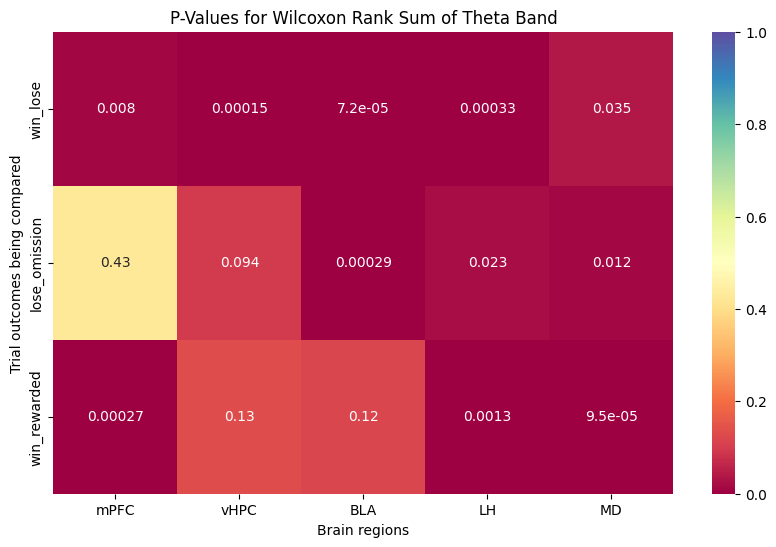

In [ ]:
# Convert dictionary to DataFrame
df = pd.DataFrame(theta_region_to_outcome_to_rank_sum)

# Split tuple into separate columns
df1 = df.applymap(lambda x: x[0])
df2 = df.applymap(lambda x: x[1])

# Plot heatmap for the first item of the tuple
plt.figure(figsize=(10, 6))
sns.heatmap(df2, annot=True, cmap="Spectral", cbar=True, vmin=0, vmax=1)
plt.title("P-Values for Wilcoxon Rank Sum of Theta Band")
plt.xlabel("Brain regions")
plt.ylabel("Trial outcomes being compared")
plt.show()


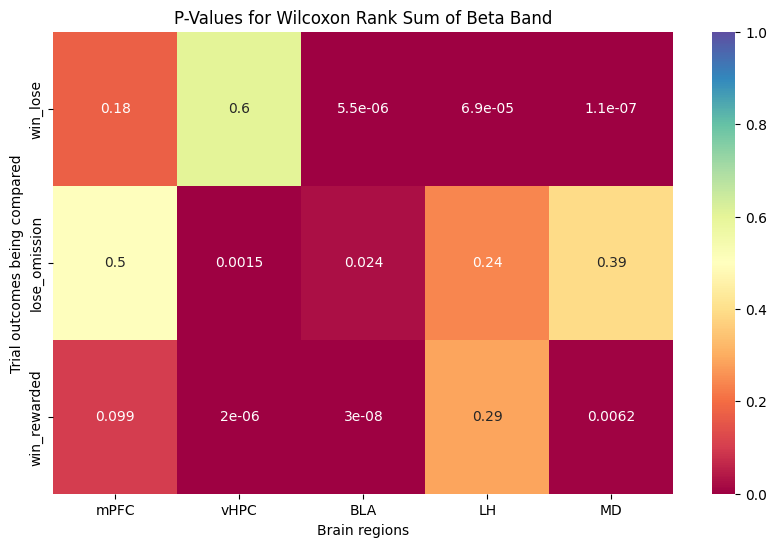

In [ ]:
# Convert dictionary to DataFrame
df = pd.DataFrame(beta_region_to_outcome_to_rank_sum)

# Split tuple into separate columns
df1 = df.applymap(lambda x: x[0])
df2 = df.applymap(lambda x: x[1])

# Plot heatmap for the first item of the tuple
plt.figure(figsize=(10, 6))
sns.heatmap(df2, annot=True, cmap="Spectral", cbar=True, vmin=0, vmax=1)
plt.title("P-Values for Wilcoxon Rank Sum of Beta Band")
plt.xlabel("Brain regions")
plt.ylabel("Trial outcomes being compared")
plt.show()

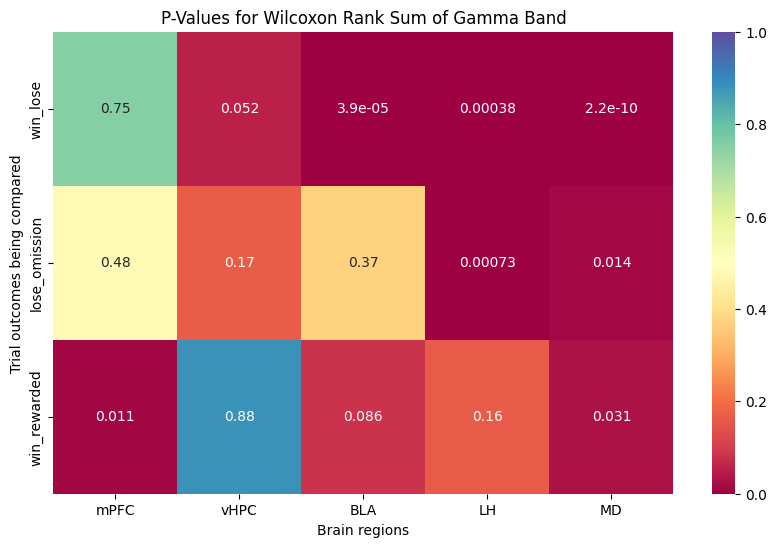

In [ ]:
# Convert dictionary to DataFrame
df = pd.DataFrame(gamma_region_to_outcome_to_rank_sum)

# Split tuple into separate columns
df1 = df.applymap(lambda x: x[0])
df2 = df.applymap(lambda x: x[1])

# Plot heatmap for the first item of the tuple
plt.figure(figsize=(10, 6))
sns.heatmap(df2, annot=True, cmap="Spectral", cbar=True, vmin=0, vmax=1)
plt.title("P-Values for Wilcoxon Rank Sum of Gamma Band")
plt.xlabel("Brain regions")
plt.ylabel("Trial outcomes being compared")
plt.show()

In [ ]:
# setting font sizeto 30
plt.rcParams.update({'font.size': 16})

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20dd88f1-e947-4b17-adfd-305614826dd7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>